In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
# Erstellt August 2020
# (c) mha

def create_sea(seed=None):
    'Creates a sea with random ships on it'
    rng = random.Random(seed)
    sea = np.zeros((10,10))
    #for l in [5, 4, 3, 2]: # Länge
    for l in [5,4,3,2]: # Länge
        n = 6-l # Anzahl
        for _ in range(n):
            # Boot mit Länge l platzieren
            while True:
                t = rng.random() < 0.5
                if t: sea = sea.T # Transponieren
                px = rng.randint(0, 10-l)
                py = rng.randint(0, 9)
                if sum(sea[px:px+l,py]) > 0:
                    continue
                sea[px:px+l, py] = 1
                if t: sea = sea.T # Transponieren
                break
    return sea

def create_detection(seed=None, l=5):
    'Creates a random detected array (for test purposes)'
    rng = random.Random(seed)
    det = np.zeros((10,10))
    px = rng.randint(0, 10-l)
    py = rng.randint(0, 9)
    det[px:px+l, py] = 1
    
    if rng.random() < 0.5: 
        det = det.T
    return det

def visualize(sea, detection):
    'Erstellt eine Veranschaulichung, 0 bzw. 4 sind detektiertes Wasser bzw. Schiff, 1 und 2 sind undetektiert.'
    return sea + sea*detection + 1 - ((1-sea)*detection)

def plot_sea(sea, det, ax=None):
    if ax is None: ax = plt.gca()
    #ax.imshow(visualize(sea, det), vmin=-2, cmap='plasma')
    ax.imshow(visualize(sea, det), vmin=-1, vmax=3.15, cmap='cividis')
    ax.axis('off')

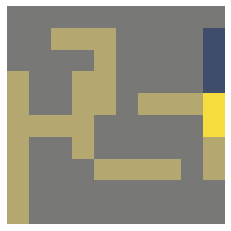

In [3]:
sea = create_sea(0)
#detection = np.zeros((10,10))
#detection[4, 0:5] = 1.
det = create_detection(l=5, seed=1)
###detected = detect(sea, det)

plt.imshow(sea*255)
plot_sea(sea, det)

In [4]:
from numba import njit, jit

@njit(cache=True)
def njit_create_sea():
    'Creates a sea with random ships on it'
    sea = np.zeros((10,10))
    for l in [5,4,3,2]: # Länge
        n = 6-l # Anzahl
        for _ in range(n):
            # Boot mit Länge l platzieren
            while True:
                t = np.random.rand() < 0.5
                if t: sea = sea.T # Transponieren
                px = np.random.randint(0, 11-l)
                py = np.random.randint(0, 10)
                if np.sum(sea[px:px+l,py]) > 0:
                    continue
                sea[px:px+l, py] = 1
                if t: sea = sea.T # Transponieren
                break
    return sea

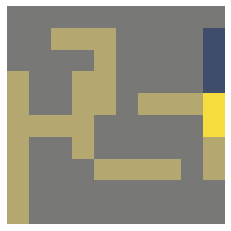

In [5]:
sea = create_sea(0)
det = create_detection(l=5, seed=1)

plt.imshow(sea*255)
plot_sea(sea, det)

In [6]:
# Ist es realistisch, in schneller Zeit ein Level einer Vorgabe zu matchen?
_sea = create_sea()
def f():
    while True:
        sea = njit_create_sea()
        #if sea[3,3]==1 and sea[4,3]==0 and sea[1,5]==1:
        if np.all(sea==_sea):
            return sea

%timeit -n 100 create_sea(0)
%timeit -n 100 njit_create_sea()
#%time f()

189 µs ± 19.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 1569.59 times longer than the fastest. This could mean that an intermediate result is being cached.
600 µs ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:

class GameState:
    def __init__(self):
        # 0 -> detektiert als Wasser
        # 1 -> undetektiert
        # 2 -> detektiert als Schiff
        self.visible = np.ones((10,10), dtype='uint8')
        self.ensemble = []
    def fillensemble(self):
        while len(self.ensemble) < 20:
            sea = njit_create_sea()
            if np.all((self.visible == 2*sea) | (self.visible==1)):
                self.ensemble.append(sea)
                
                
s = GameState()

In [8]:
s.visible[5,5] = 2
s.visible[4,5] = 2
s.visible[5,4] = 2
s.visible[4,4] = 2
s.visible[2,2] = 0
s.visible[1,2] = 0
s.visible[2,1] = 0
s.visible[1,1] = 0

%timeit -n 100 s.fillensemble()

The slowest run took 1906.38 times longer than the fastest. This could mean that an intermediate result is being cached.
52.2 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


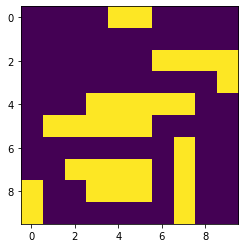

In [9]:
plt.imshow(s.ensemble[17])

In [10]:
N=M=10

@njit(cache=True)
def _validmoves(visible):
    return [ (i, j) for i in range(N) for j in range(M) if visible[i,j] == 0 ]

class BSGame:
    '''Class for the game Hex, providing game specific function which can be used
    by a generic AI'''

    @staticmethod
    def getValidActions(state):
        return _validmoves(state.visible)
    @staticmethod
    def getNextState(state, move):
        k = np.random.randint(len(state.ensemble))
        state2 = GameState()
        state2.visible[i,j] = 2*state.ensemble[k]
        state2.ensemble = [ e for e in state.ensemble if e[i,j]==state2.visible[i,j]//2 ]
        state2.fillensemble()
        return state2
    @staticmethod
    def getEnded(board):
        return _winner(board)

    @staticmethod
    def getPlayerReward(reward, board):
        #turn = 1 if np.sum(board!=0)%2==0 else -1
        turn = _turn(board)
        return reward*turn
    
    @staticmethod
    def getTurn(board):
        return _turn(board)

    @staticmethod
    def getHashable(board):
        ##return _hash(board)
        return board.tostring()

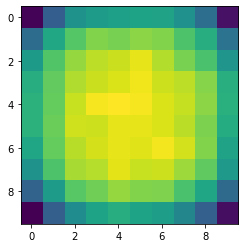

In [117]:
seas = []
for i in range(10000):
    seas.append(create())
plt.imshow(np.mean(seas, 0))

### Selbst spielen

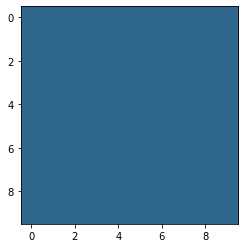

Next target?lü


KeyboardInterrupt: 

In [4]:
# gegeben: sea, model
det = np.zeros((10,10))
##det = create_detection()
i,j = [],[]

while True:
    # Bild anzeigen
    plt.imshow(det*sea+det+1, vmin=0., vmax=3.)
    plt.scatter(j, i, c='black', alpha=1, s=150)
    plt.show()
    #plt.imshow(prob)
    #plt.show()
    
    # Welchen Detektieren??
    text = input('Next target?')
    try:
        j, i = eval('(' + text + ')')
        det[i,j] = 1.
    except:
        continue
    
    # Ausgabe und Statistik
    print('______________________________')
    if (sea[i,j]):
        print('Hit him!')
    else:
        print('Failed!')
    print(f'Hits: {np.sum(det*sea)}/{np.sum(sea)}, Shots: {np.sum(det)}, Percentage: {100*np.sum(det*sea)/np.sum(det)}%')
    
    if np.sum(det*sea) >= np.sum(sea): break

### Modell trainieren

In [11]:
def encode_x(sea, det):
    'Encodes the visible information to an input to the neural network'
    return np.stack([(1-sea)*det, (1-det), sea*det], -1)
    

def batchgen(size=50):
    while True:
        xs, ys = [], []
        for _ in range(size):
            sea = njit_create_sea()
            ##det = create_detection(l=5)
            det = np.random.rand(10,10) < np.random.rand() * 0.6
            x = encode_x(sea, det)
            xs.append(x)
            ys.append(sea.reshape((10,10,1)))
        yield np.array(xs), np.array(ys)
        

In [12]:
collection = np.load('data/schiffeversenken_collection.npy')
collection.shape # = (14426, 2, 10, 10)
seas = collection[:,0]
dets = collection[:,1]
num = len(seas)

def batchgen_coll(size=50):
    while True:
        xs, ys = [], []
        for _ in range(size):
            i = np.random.randint(0, num)
            x = encode_x(seas[i], dets[i])
            xs.append(x)
            ys.append(seas[i].reshape((10,10,1)))
        yield np.array(xs), np.array(ys)

FileNotFoundError: [Errno 2] No such file or directory: 'data/schiffeversenken_collection.npy'

In [13]:

import torch
from torch import nn


relu = torch.nn.ReLU()
sigmoid = torch.nn.Sigmoid()

class ResBlock(nn.Module):
    def __init__(self, n, sz=3, bn=True):
        super().__init__()
        self.bn = bn
        if bn:
            self.conv1 = nn.Conv2d(n, n, sz, padding=sz//2)
            self.conv2 = nn.Conv2d(n, n, sz, padding=sz//2)
            self.bn1 = nn.BatchNorm2d(n)
            self.bn2 = nn.BatchNorm2d(n)
        else:
            self.conv1 = nn.Conv2d(n, n, sz, padding=sz//2)
            self.conv2 = nn.Conv2d(n, n, sz, padding=sz//2)
            
    def forward(self, x):
        x0 = x
        if self.bn:
            x = self.bn1(x)
            x = relu(x)
            x = self.conv1(x)
            x = self.bn2(x)
            x = relu(x)
            x = self.conv2(x)
        else:
            x = relu(x)
            x = self.conv1(x)
            x = relu(x)
            x = self.conv2(x)
        return x0 + x

    
class bship_nnet(nn.Module):
    def __init__(self, n=32, nblocks=1):
        'BattleShip CNN. More than 1 blocks didnt make a difference.'
        super().__init__()
        self.conv1 = nn.Conv2d(3, n, 5, padding=2)
        self.resblocks = nn.ModuleList([ ResBlock(n) for _ in range(nblocks) ])
        self.conv_m2 = nn.Conv2d(n, n, 3, padding=1)
        self.conv_m1 = nn.Conv2d(n, 1, 3, padding=1)
        
    def forward(self, x):
        # NHWC zu NCHW
        x = x.permute([0, 3, 1, 2])
        
        x = self.conv1(x)
        x_res = x = relu(x)
        for block in self.resblocks:
            x = block(x)
        #x = self.conv_m2(x)
        #x = x_res + x
        x = self.conv_m1(x)
        x = sigmoid(x)
        
        # NCHW zu NHWC
        x = x.permute([0, 2, 3, 1])
        return x
    
    def predict(self, numpy_x):
        'Takes a numpy array and give out one, i. e. 10x10 -> 10x10'
        x = torch.from_numpy(numpy_x[None,:].astype('float32'))
        y = self(x)
        return y[0,:,:,0].detach().cpu().numpy()
    
def augment(x, y):
    r = np.random.rand
    if r()<0.5:
        x, y = x[:,::-1], y[:,::-1]
    if r()<0.5:
        x, y = x[:,:,::-1], y[:,:,::-1]
    if r()<0.5:
        x, y = x.transpose(1,2), y.transpose(1,2)
    return x, y

In [14]:
net = bship_nnet()
optimizer = torch.optim.Adam(lr=1e-3, params=net.parameters())

In [17]:
bg = batchgen()
criterion = nn.BCELoss()
losses = []

for _ in range(400):
    optimizer.zero_grad()
    x, yt = next(bg)
    #x, yt = augment(x, yt)
    x, yt = torch.from_numpy(x.astype('float32')), torch.from_numpy(yt.astype('float32'))
    yp = net(x)
    loss = criterion(yp.view(-1), yt.view(-1))
    loss.backward()
    optimizer.step()
    losses += [loss.item()]
    if len(losses) == 20:
        print(np.mean(losses))
        losses = []

0.38634939044713973
0.38517152816057204
0.3944815516471863
0.38229250758886335
0.3938267260789871
0.3851358160376549
0.3932614609599113
0.38216078728437425
0.38534033447504046
0.37662952542304995
0.38453089594841006
0.37051779329776763
0.3836885362863541
0.3787000313401222
0.3853679791092873
0.3757852345705032
0.38325614482164383
0.3827509701251984
0.38207015991210935
0.3855128183960915


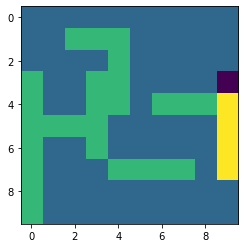

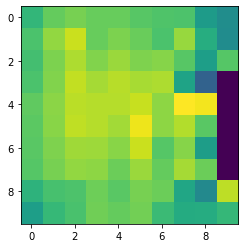

In [121]:
det = create_detection()
#x = torch.from_numpy(encode_x(sea, det)[None,:].astype('float32'))
#prob = net(x)[0,:,:,0].detach().cpu().numpy()
prob = net.predict(encode_x(sea, det))
prob[det > 0] = 0
plt.imshow(visualize(sea, det))
plt.show()
plt.imshow(prob)
plt.show()

In [45]:

import keras
import keras.layers as L
from keras.layers import Input, Conv2D, Lambda, Add, ReLU as relu, Activation, Reshape


x = inp_g = Input((10,10,3))
x = Conv2D(32, (5,5), padding='same')(x)
x_res = x = relu()(x)

for i in range(1): ## war 4
    xr = x
    x = Conv2D(32, (3,3), padding='same')(x)
    x = relu()(x) # EDSR
    x = Conv2D(32, (3,3), padding='same')(x)
    x = Add()([x, xr])
    
x = Conv2D(32, (3,3), padding='same')(x)
#x = Add()([x_res, x])
    
x = Conv2D(1, (1,1), padding='same')(x)
x = Activation('sigmoid')(x)
#x = Reshape((10*10,))(x)
#x = Activation('softmax')(x)
#x = Reshape((10, 10, 1))(x)

model = keras.Model(inp_g, x)

In [46]:
bg=batchgen()
#bg=batchgen_coll()

model.compile('adam', 'binary_crossentropy')

model.fit_generator(bg, 200, 2)

Epoch 1/2
200/200 [==============================] - 3s 15ms/step - loss: 0.4228
Epoch 2/2
200/200 [==============================] - 3s 13ms/step - loss: 0.3895


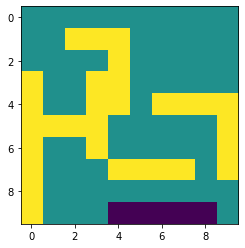

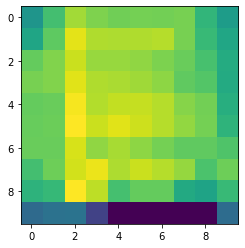

In [47]:
det = create_detection()
prob = model.predict(create_x(sea, det).reshape((1,10,10,3)))[0,:,:,0]
prob[det > 0] = 0
plt.imshow(visualize(sea, det))
plt.show()
plt.imshow(prob)
plt.show()

### AI spielt

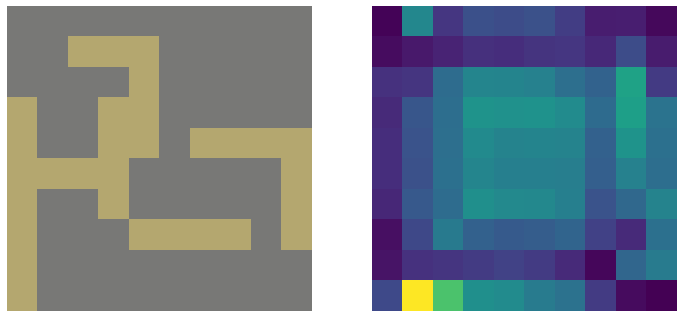

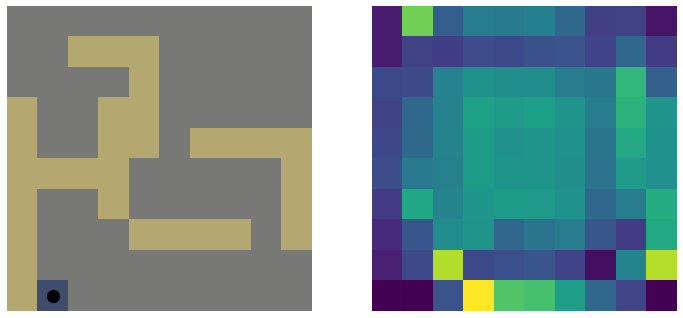

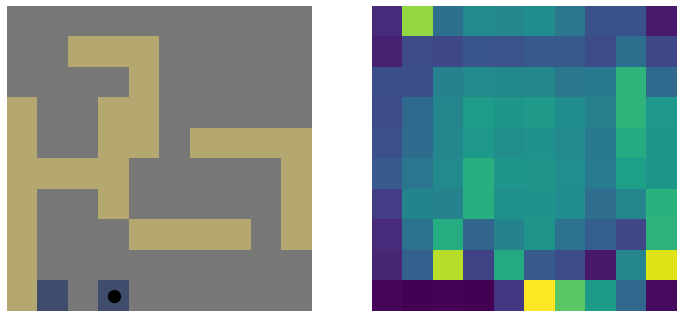

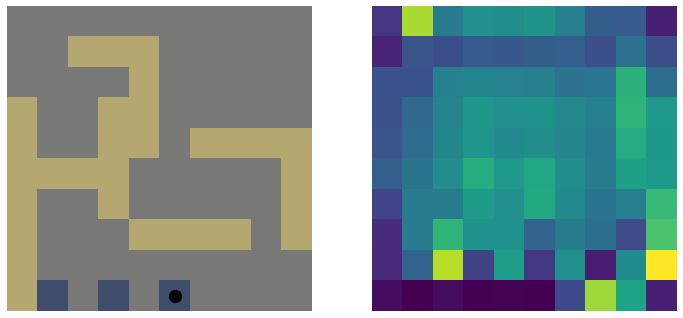

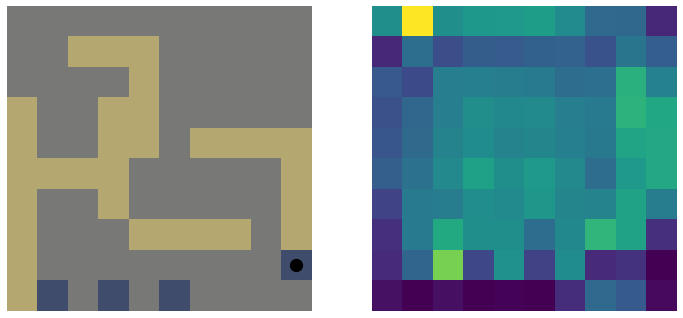

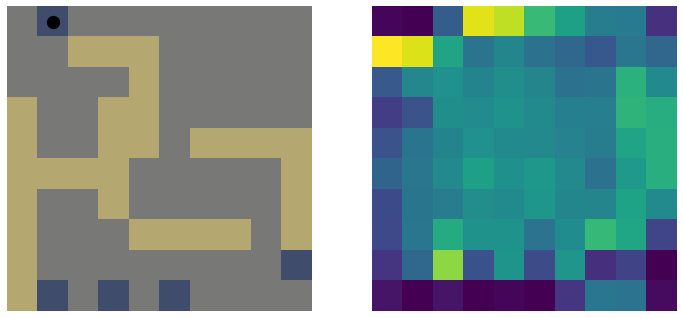

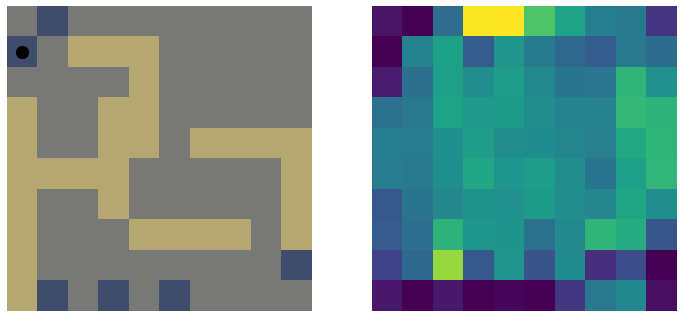

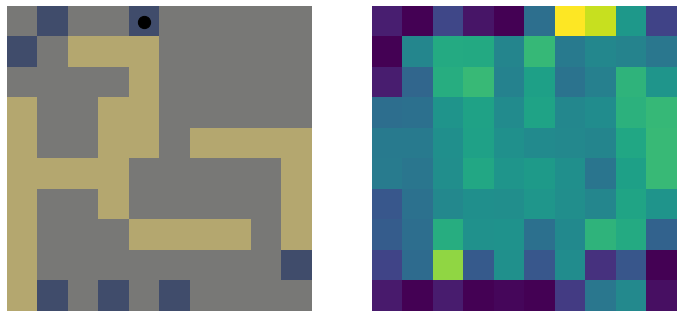

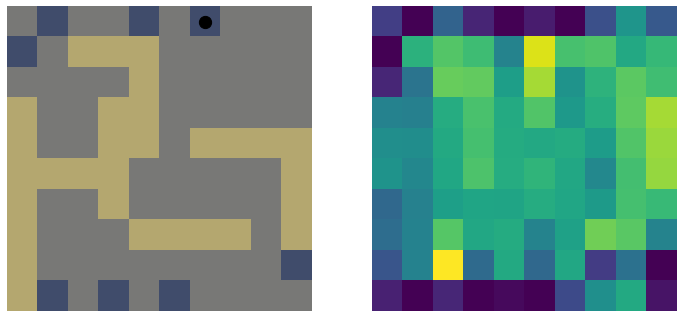

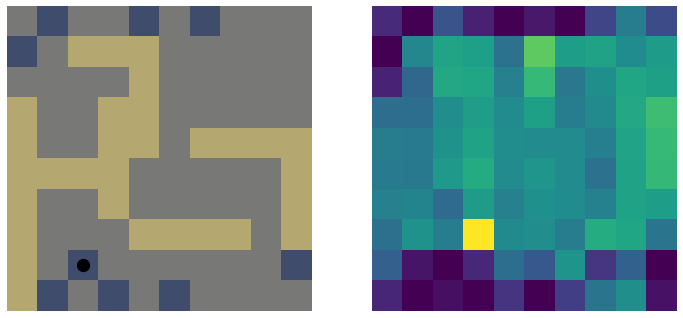

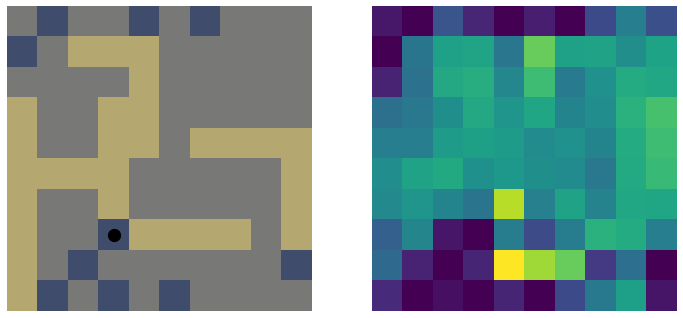

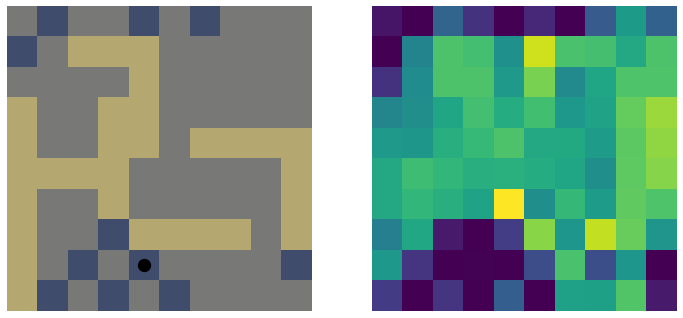

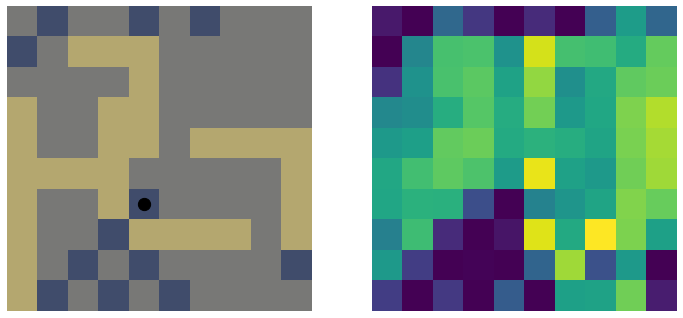

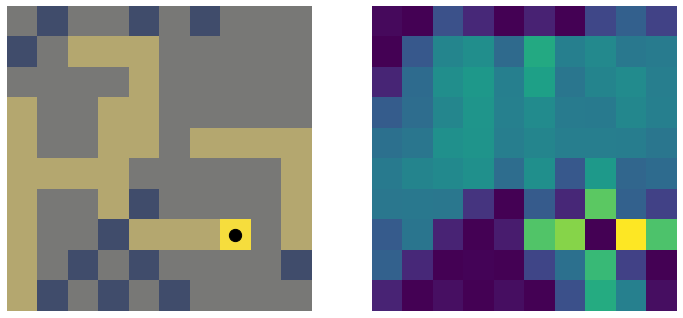

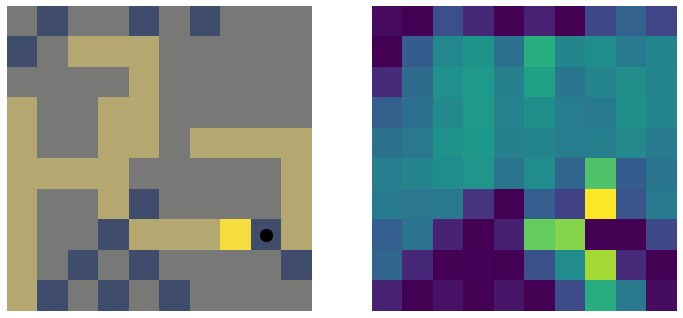

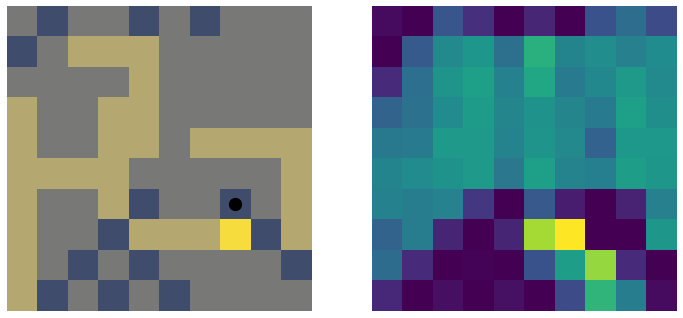

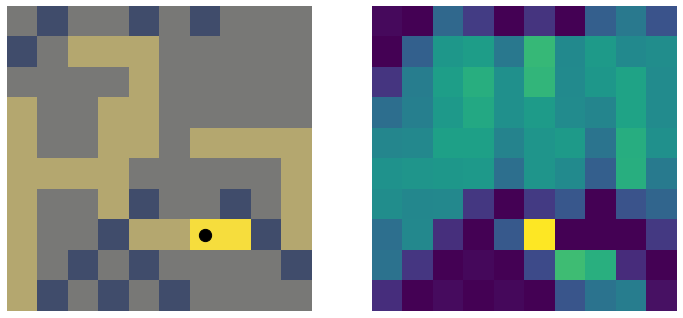

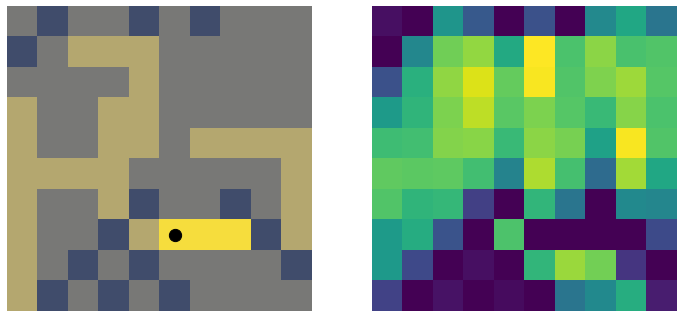

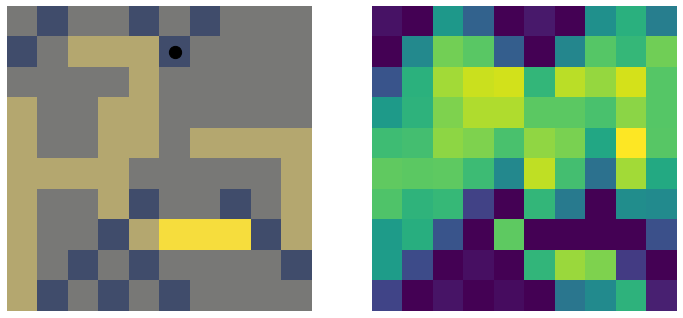

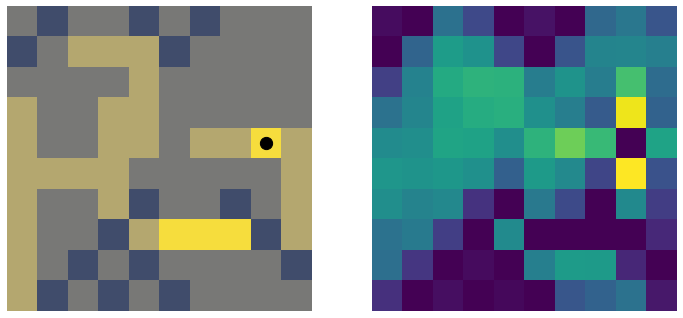

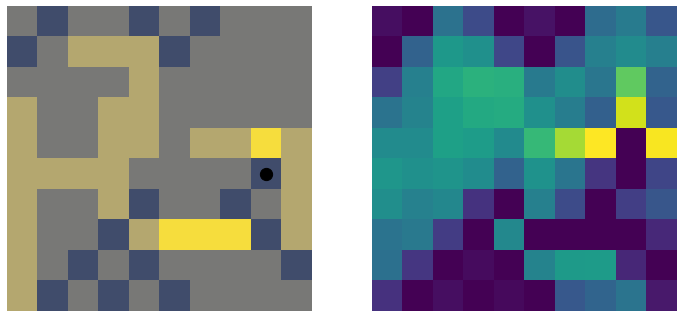

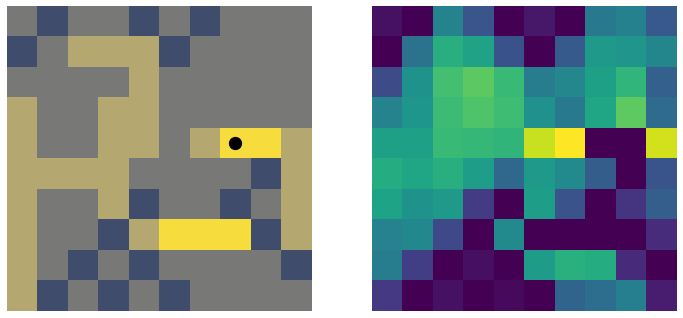

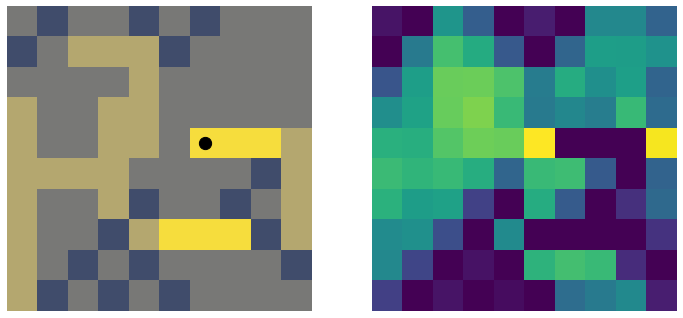

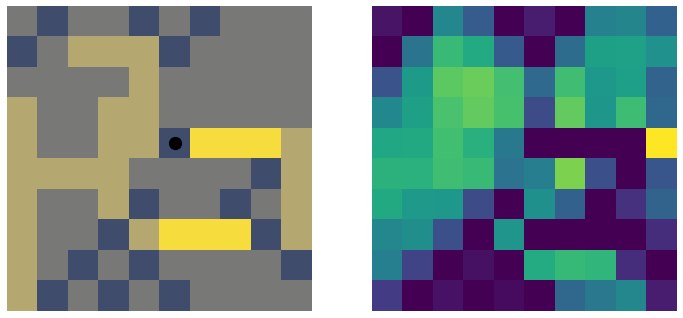

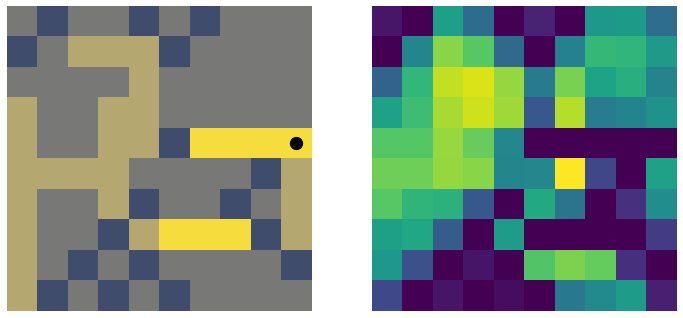

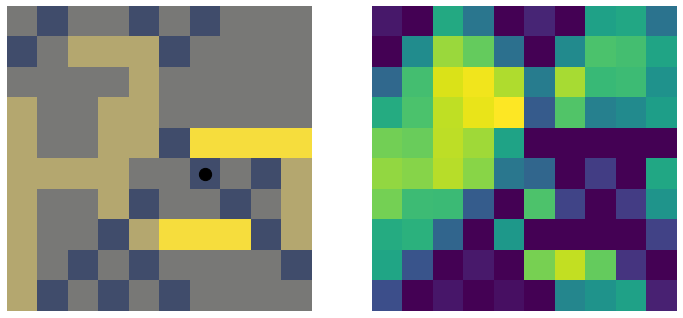

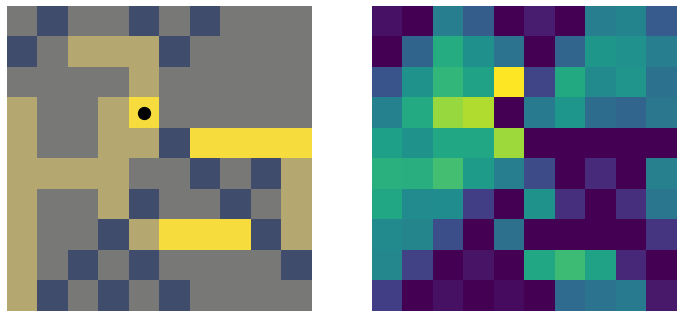

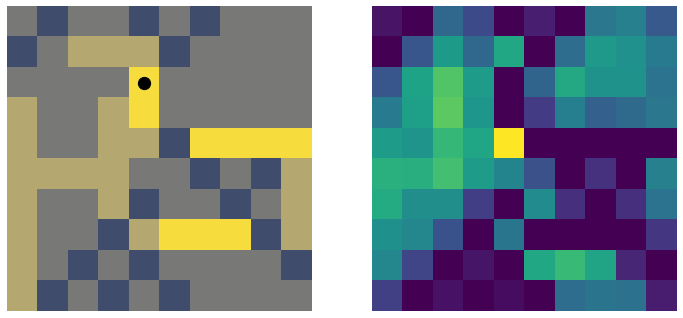

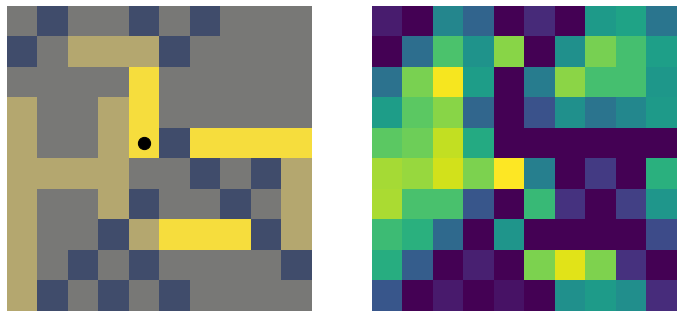

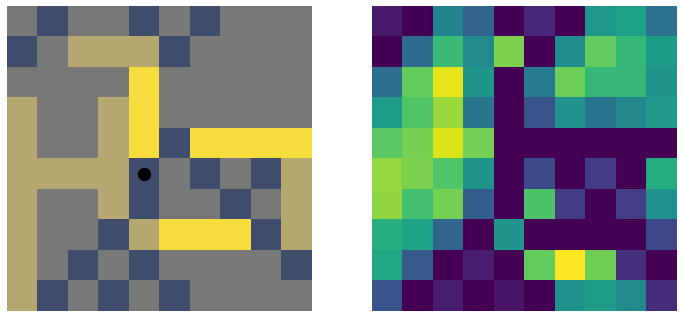

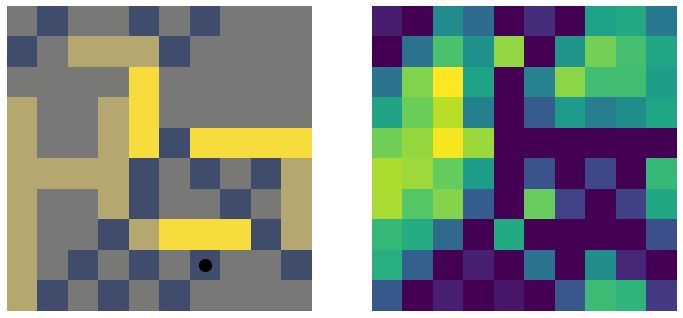

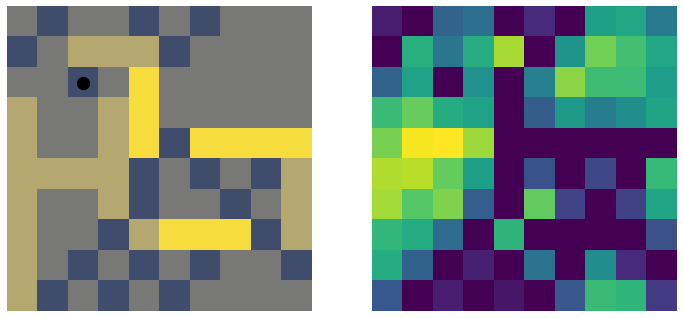

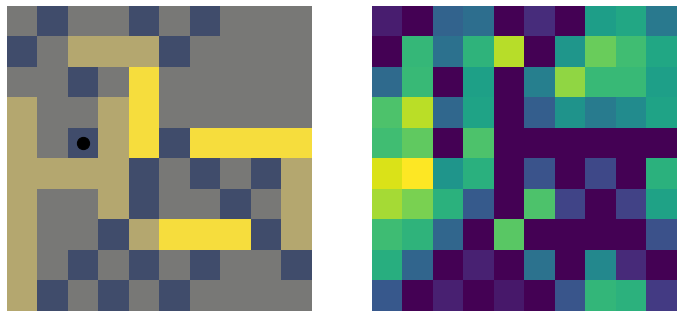

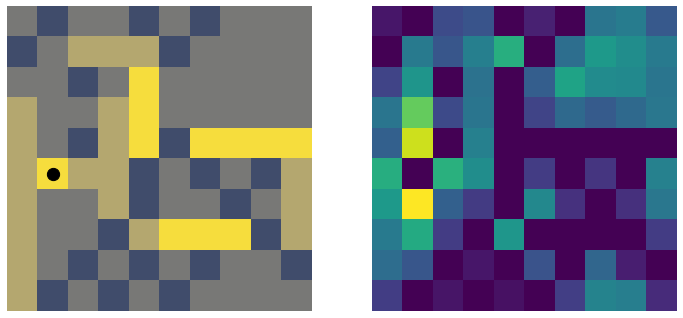

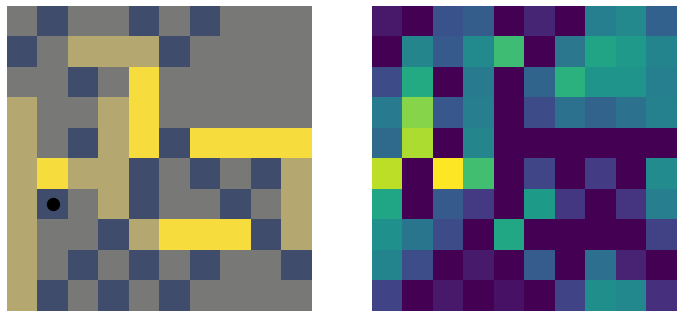

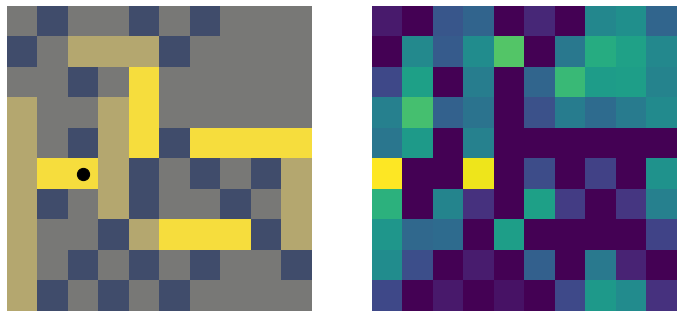

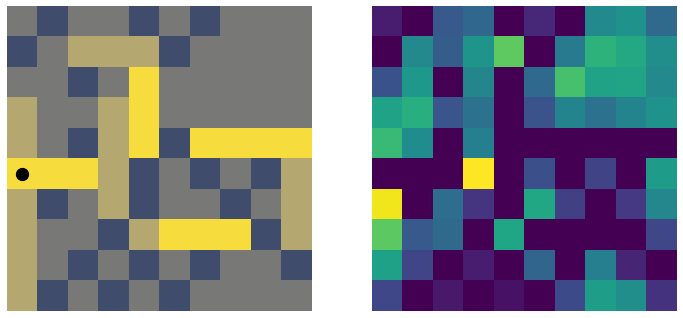

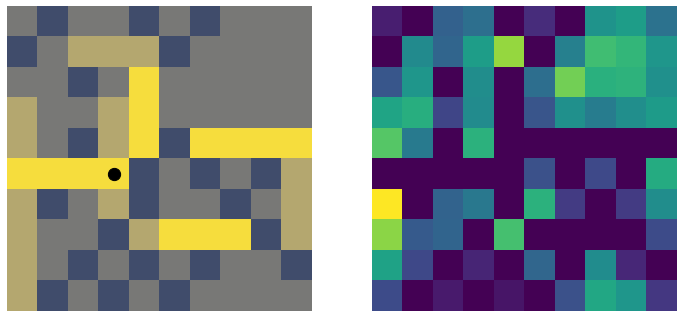

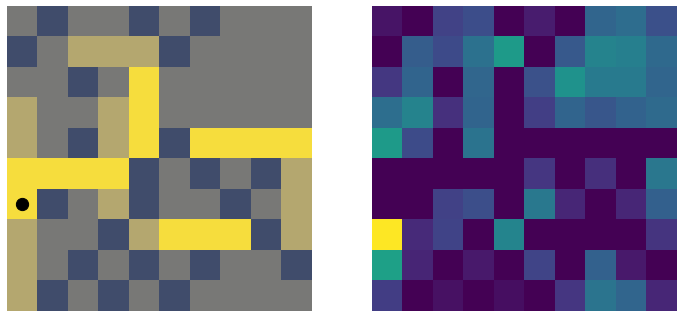

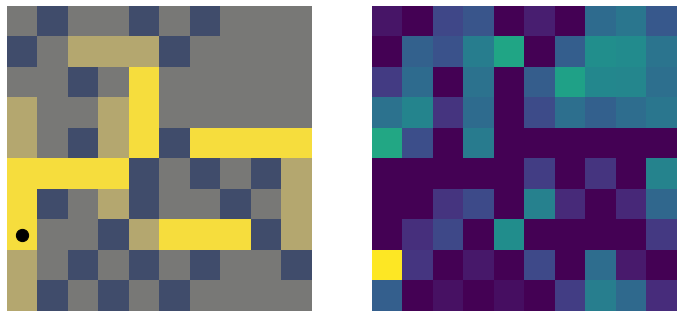

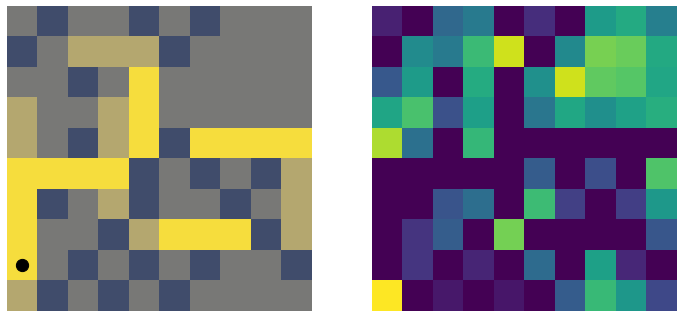

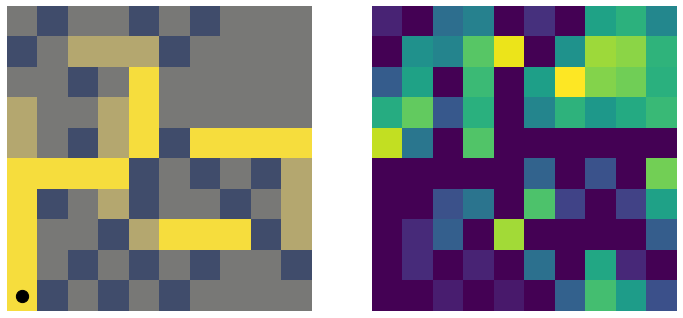

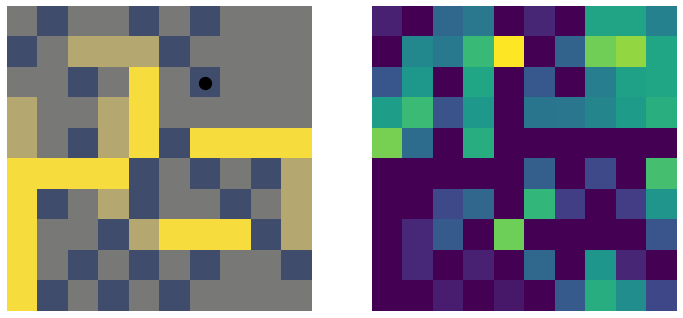

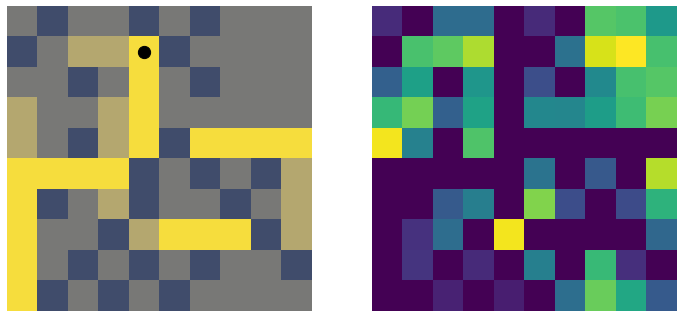

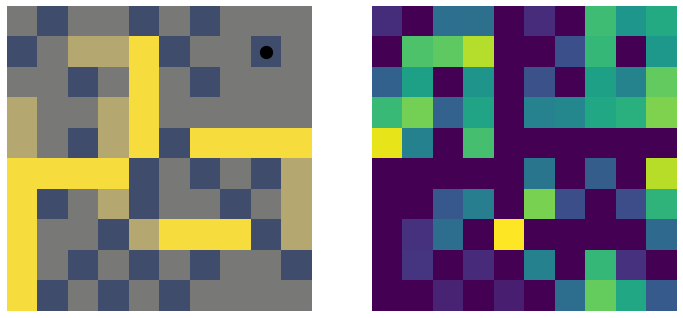

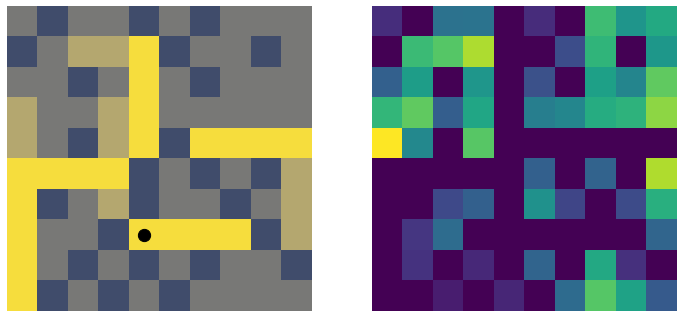

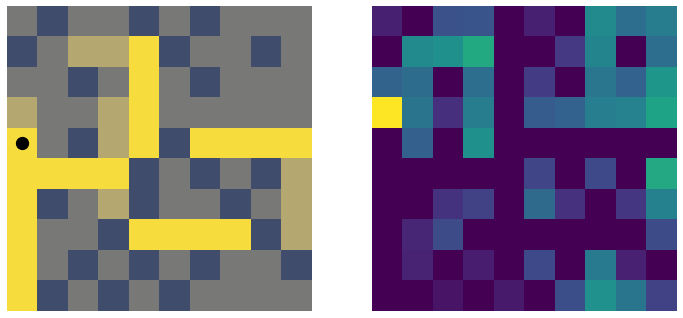

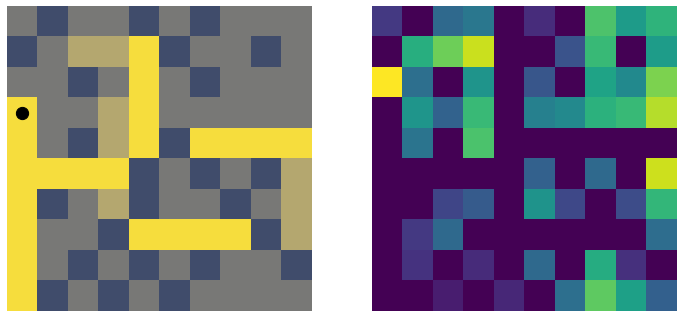

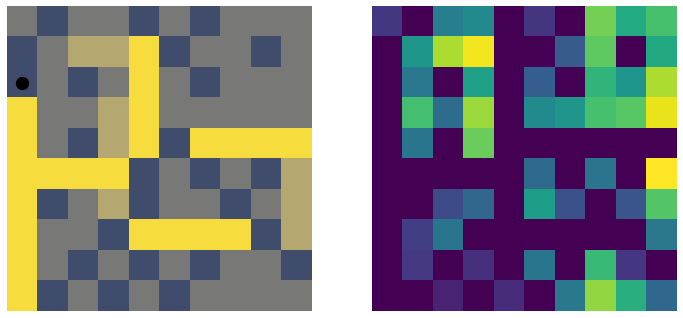

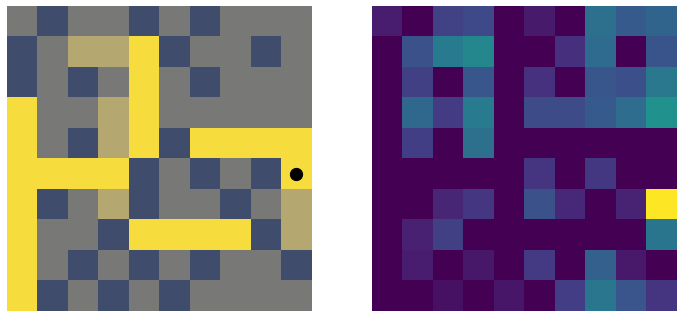

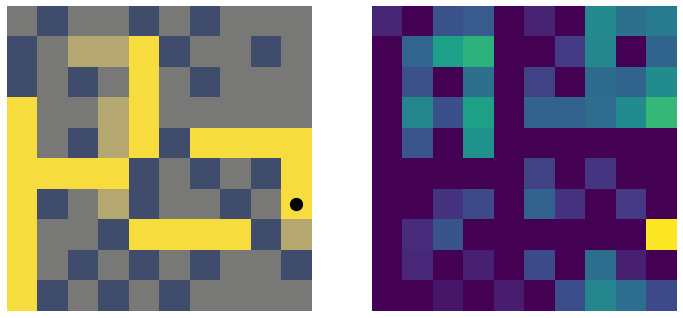

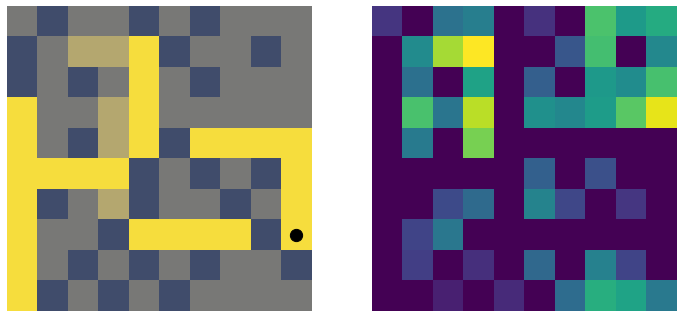

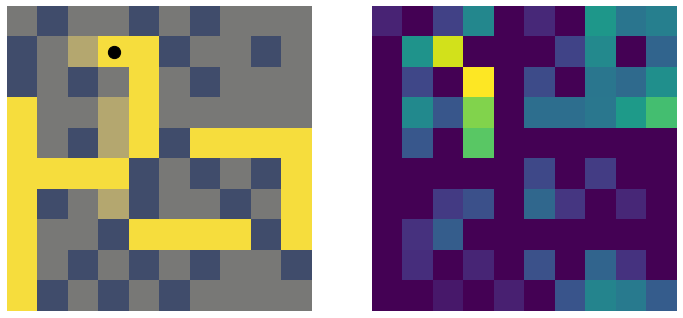

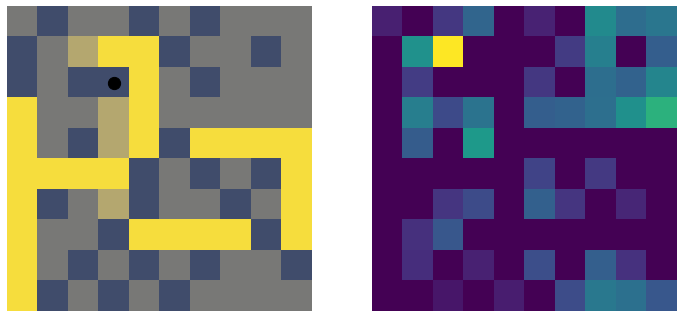

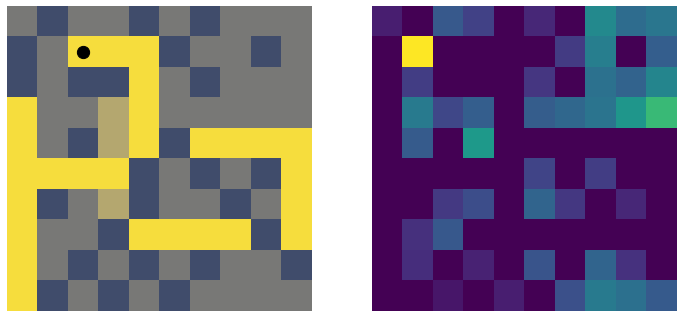

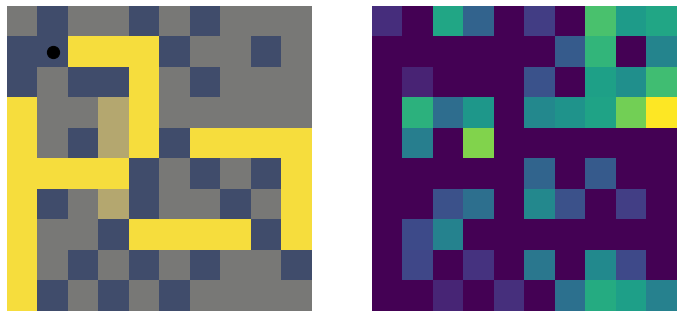

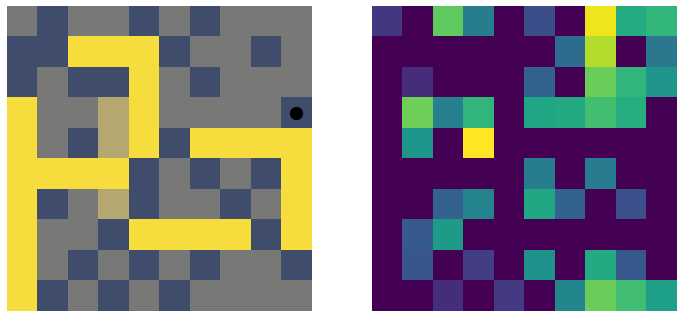

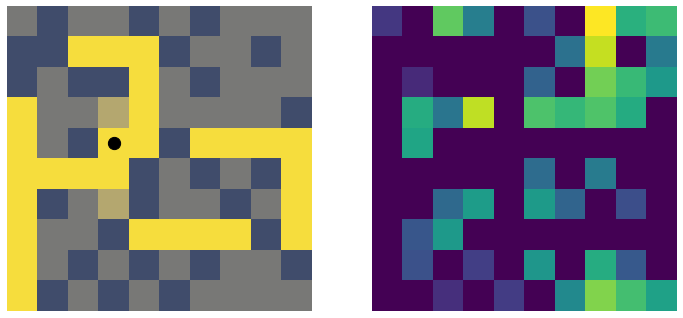

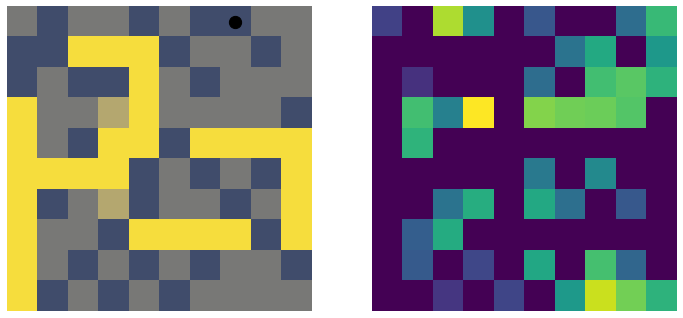

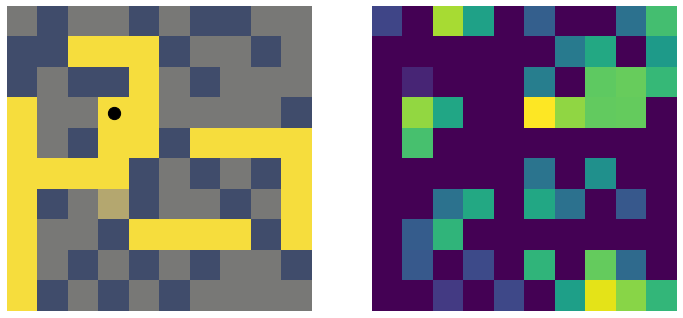

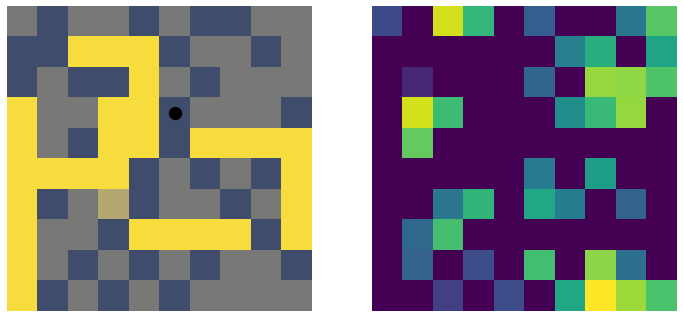

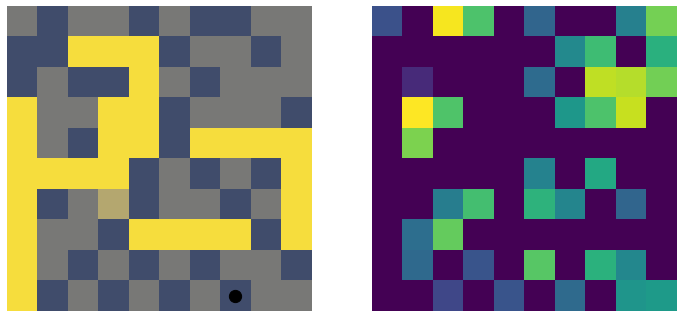

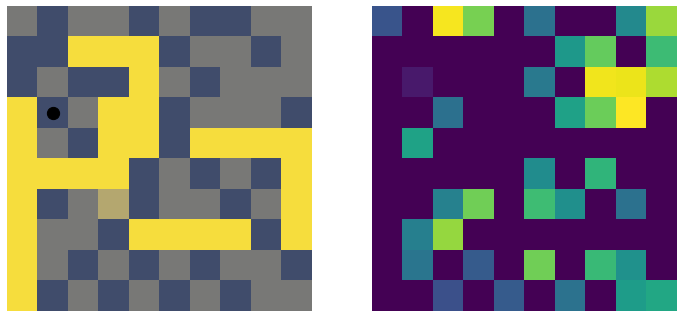

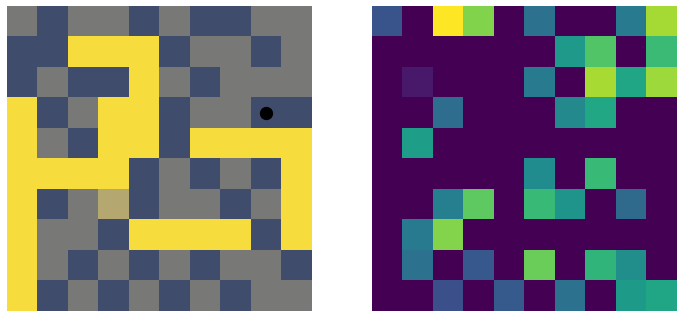

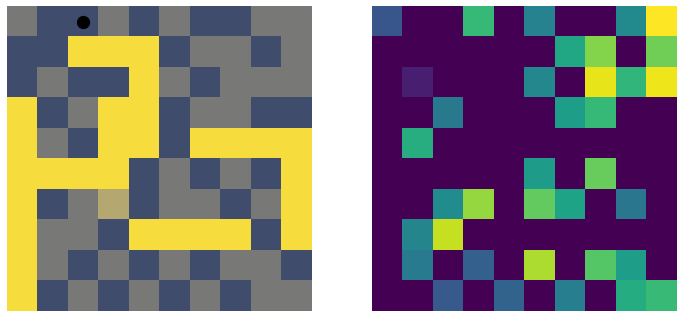

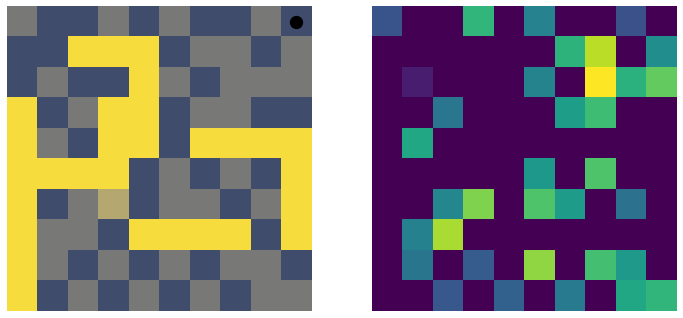

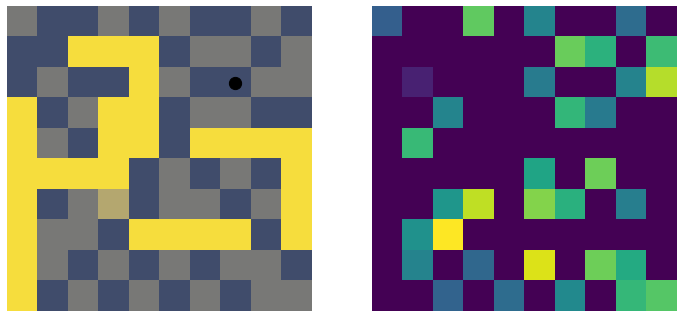

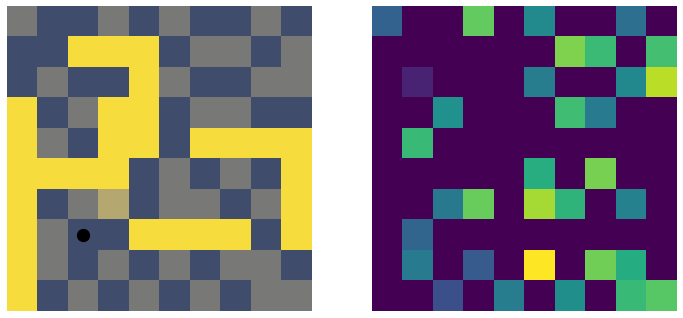

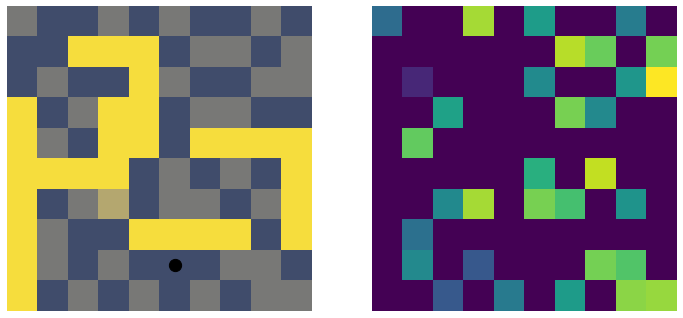

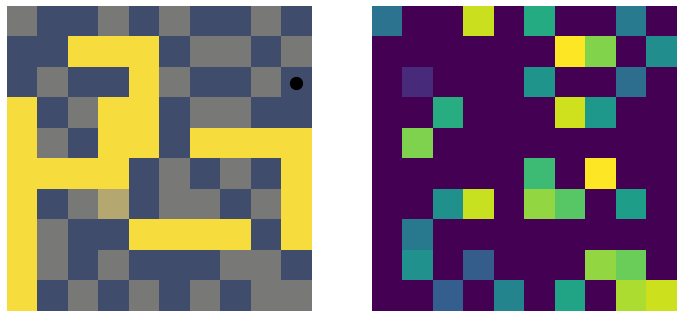

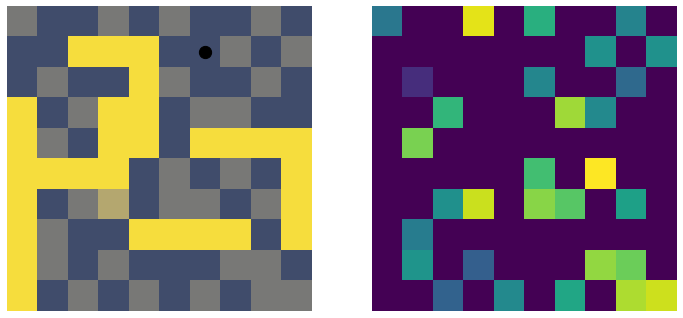

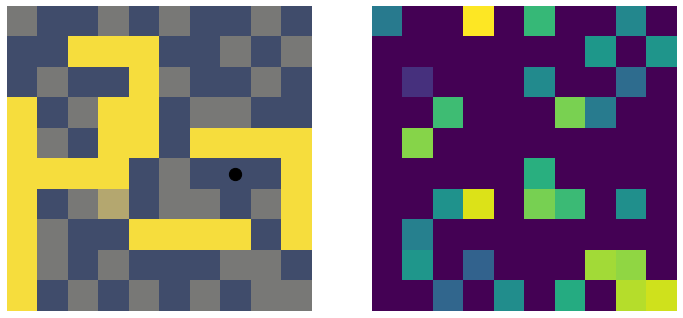

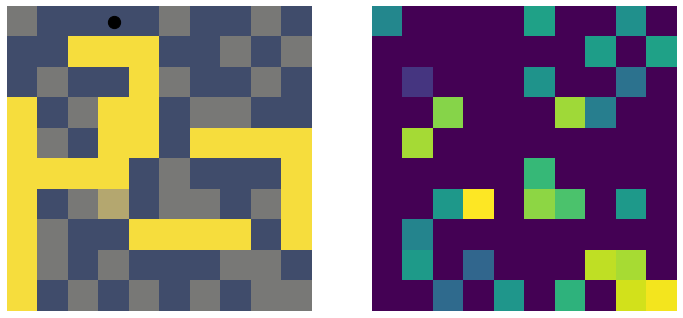

In [18]:
# gegeben: sea, model
det = np.zeros((10,10))
##det = create_detection()
i,j = [],[]


while True:
    prob = net.predict(encode_x(sea, det))
    prob[det > 0] = 0
    percent = 0. if np.sum(det)==0 else 100*np.sum(det*sea)/(np.sum(det)+1e-2)
    text = f'Hits: %d, Shots: %d, Percentage: %.1f %%' % (np.sum(det*sea), np.sum(det), percent)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    ##fig.text(1/2,0.8, text, fontdict={})
    ax1.axis('off')
    #ax1.imshow(visualize(sea, det), vmin=0., vmax=3.)
    plot_sea(sea, det, ax1)
    ax1.scatter(j, i, c='black', alpha=1, s=150)
    ax2.axis('off')
    ax2.imshow(prob)
    #plt.title(text)
    plt.show()
    
    if np.sum(det*sea) >= np.sum(sea): break
        
    # Welchen Detektieren??
    m = prob.argmax()
    i, j = m//10, m%10
    det[i,j] = 1.

    

### AI untersuchen
Wie lange benötigt sie für ein Spiel? Als Histogramm anzeigen?

In [20]:
collection = []

def solve_game(sea, model=model, verbose=False):
    det = np.zeros((10,10))
    while True:
        prob = model.predict(create_x(sea, det).reshape((1,10,10,3)))[0,:,:,0]
        prob[det > 0] = 0
        
        m = prob.argmax()
        i, j = m//10, m%10
        det[i,j] = 1.
        if verbose: 
            print(f'Hits: {np.sum(det*sea)}/{np.sum(sea)}, Shots: {np.sum(det)}, Percentage: {100*np.sum(det*sea)/np.sum(det)}%')
            
        if np.sum(det*sea) >= np.sum(sea): # Spiel gewonnen
            return int(np.sum(det))
        
        # Daten aufzeichnen
        if np.random.rand() < 1/50:
            collection.append((sea.copy(), det.copy()))

In [39]:
ns = []
for i in range(1000):
    if i%100==0: print(i, len(collection))
    sea = create_sea(1e8+i)
    n = solve_game(sea, model)
    ns.append(n)

0 22369


KeyboardInterrupt: 

In [22]:
#np.save('schiffeversenken_collection', collection)

Mean: 73.8301, Std: 7.802770917436958


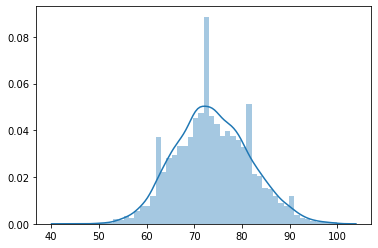

In [27]:
import seaborn as sns
sns.distplot(ns)
print(f'Mean: {np.mean(ns)}, Std: {np.std(ns)}')

### Beispiel, das für die AI schwer war

In [41]:
nsa.argmax()

114

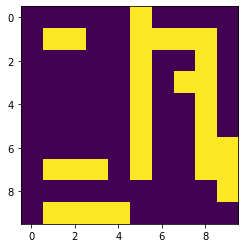

In [42]:
plt.imshow(create_sea(114))

## GAN
Sea ist teilweise vom Fog of war verdeckt, dieser Teil soll durch eine GAN zufällig rekonstruiert werden.

In [24]:
random_dim = 128
input_dim = 3*10*10

# Taken from MNIST-GAN
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(input_dim+random_dim, 512, normalize=False),
            *block(512, 1024),
            *block(1024, 2048),
            *block(2048, 512),
            nn.Linear(512, 10*10),
            nn.Sigmoid()
        )

    def forward(self, x, z):
        b, h, w, c = x.shape
        x = x.view(b, -1) 
        out = self.model( torch.cat((x, z), 1) )
        out = out.view(b, h, w, 1)
        return out
    
lrelu = nn.LeakyReLU(0.2)
sigmoid = nn.Sigmoid()
class Discriminator(nn.Module):
    def __init__(self, n=32):
        super(Discriminator, self).__init__()
        
        sn = torch.nn.utils.spectral_norm
        
        self.conv1 = sn(nn.Conv2d(4, n, 3, padding=1))
        self.conv2 = sn(nn.Conv2d(n, 2*n, 2, stride=2)) # 5x5
        self.conv3 = sn(nn.Conv2d(2*n, 2*n, 2, stride=2, padding=1)) # 3x3
        self.lin1 = sn(nn.Linear(2*n*3*3, 256))
        self.lin2 = sn(nn.Linear(256, 1))

    def forward(self, x, y):
        b, h, w, c = x.shape
        x  =  x.permute([0, 3, 1, 2])
        y = y.permute([0, 3, 1, 2])
        
        x = torch.cat((x, y), 1)
        x = lrelu(self.conv1(x))
        x = lrelu(self.conv2(x))
        x = lrelu(self.conv3(x))
        x = x.reshape(b, -1)
        x = lrelu(self.lin1(x))
        x = self.lin2(x)
        
        return x
    
    

'''class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        sn = torch.nn.utils.spectral_norm
        self.model = nn.Sequential(
            sn(nn.Linear(4*10*10, 2048)),
            nn.LeakyReLU(0.2, inplace=True),
            sn(nn.Linear(2048, 512)),
            nn.LeakyReLU(0.2, inplace=True),
            sn(nn.Linear(512, 1)),
        )

    def forward(self, x, y):
        b, h, w, c = x.shape
        x = x.view(b, -1)
        y = y.view(b, -1)
        t = self.model( torch.cat((x, y), 1) )

        return t'''
    
    

gen = Generator()
dis = Discriminator()
gen.cuda()
dis.cuda()
gen.optim = torch.optim.Adam(lr=1e-4, betas=(0.5, 0.99), params=gen.parameters())
dis.optim = torch.optim.Adam(lr=1e-4, betas=(0.5, 0.99), params=dis.parameters())

gen.losses = []
dis.losses = []
gen.iters = 0

  0%|          | 0/9999999 [00:00<?, ?it/s]

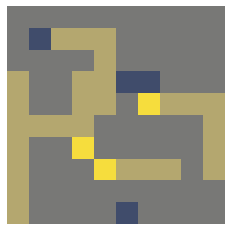

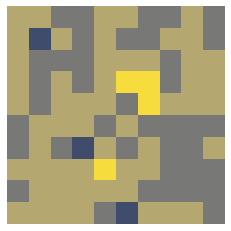

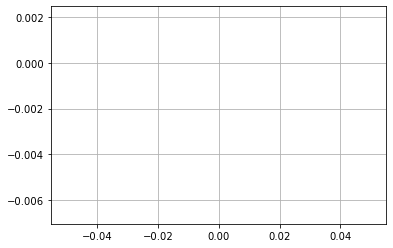

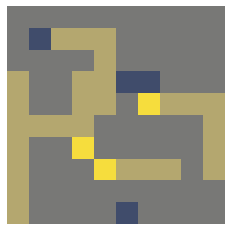

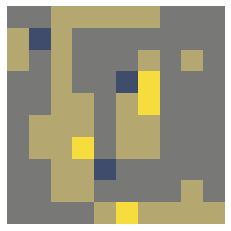

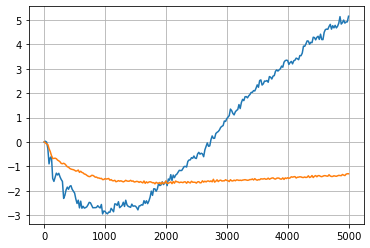

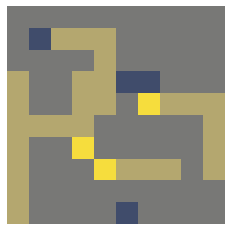

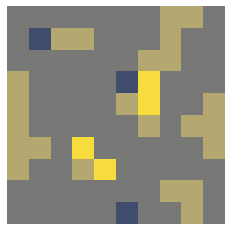

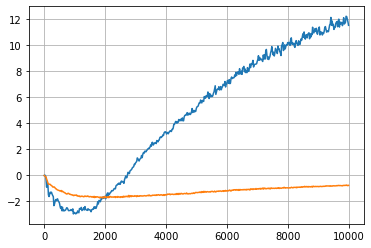

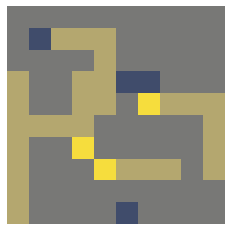

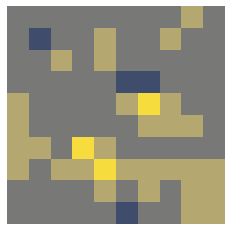

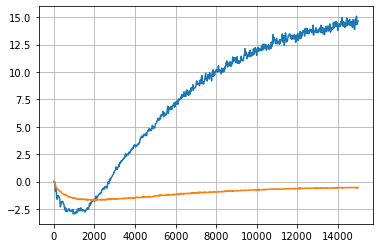

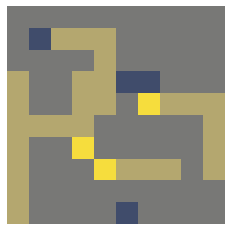

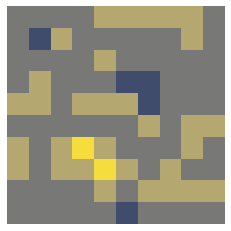

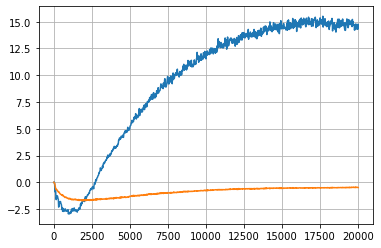

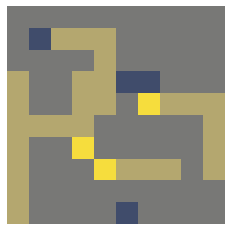

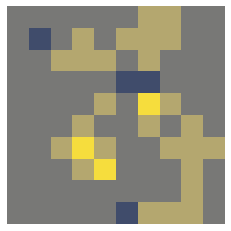

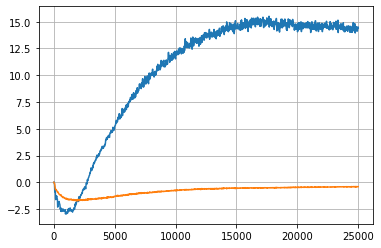

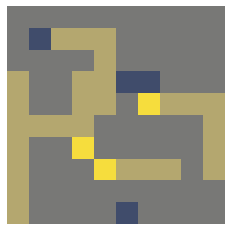

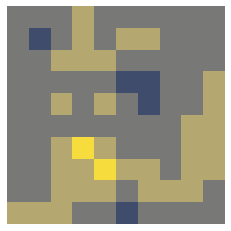

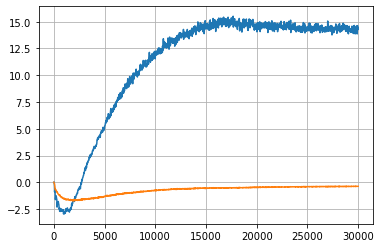

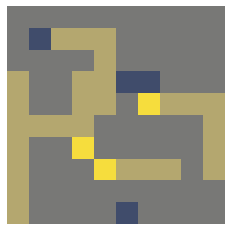

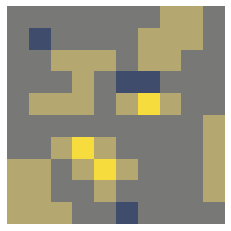

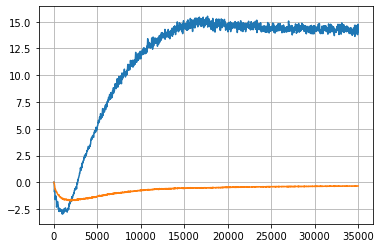

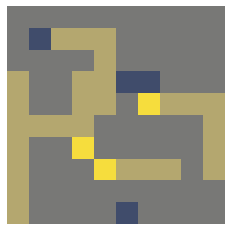

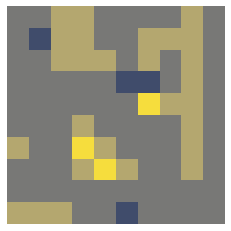

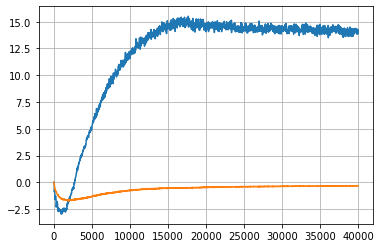

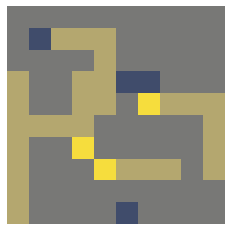

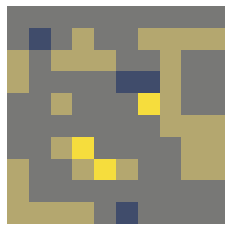

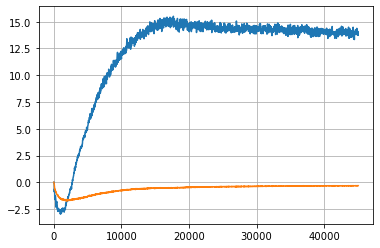

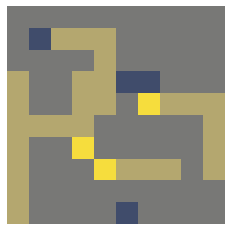

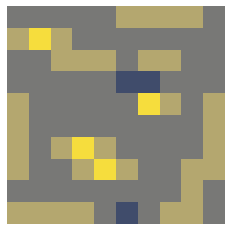

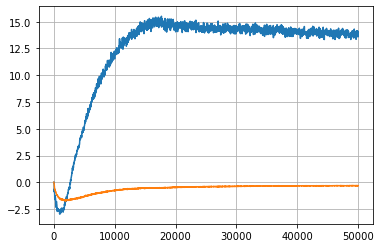

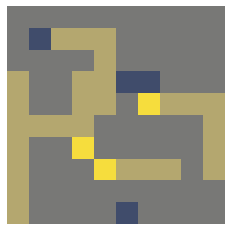

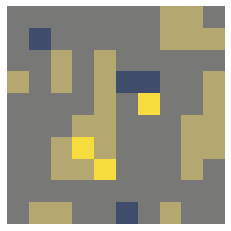

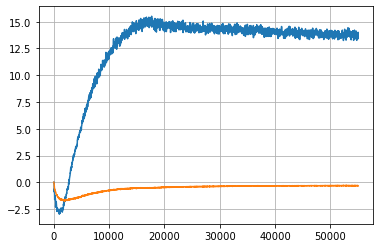

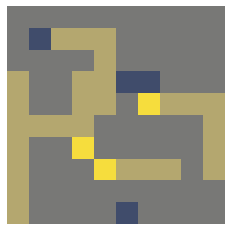

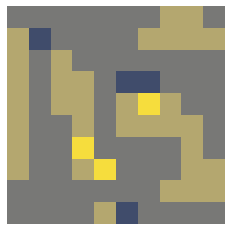

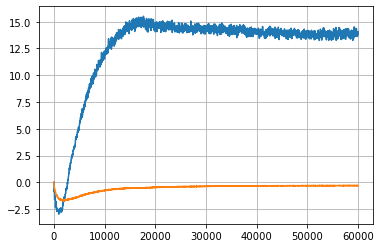

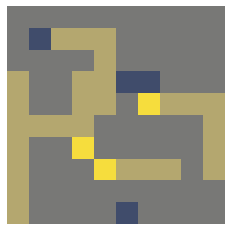

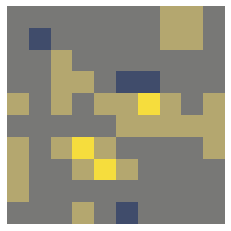

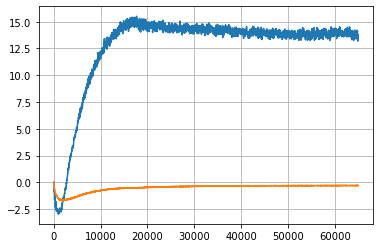

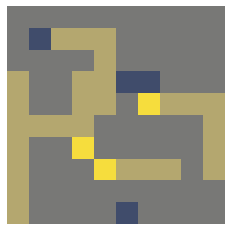

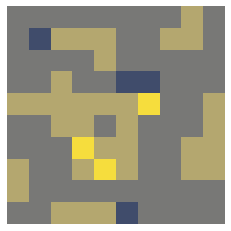

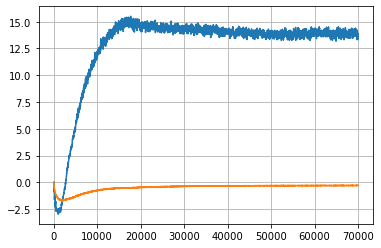

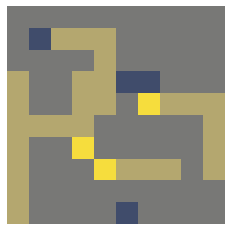

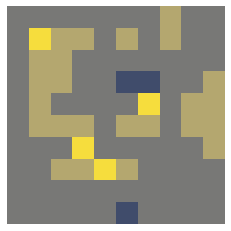

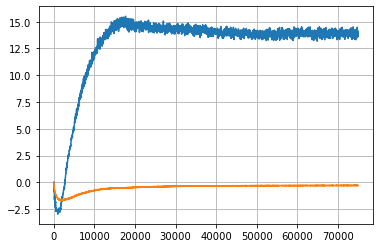

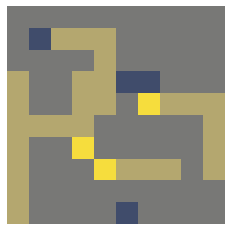

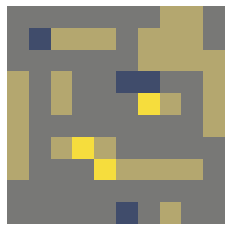

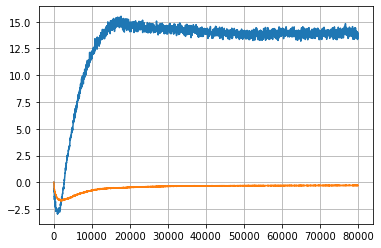

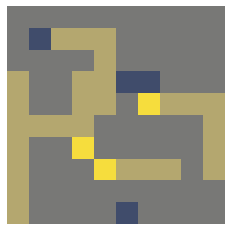

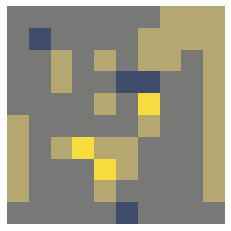

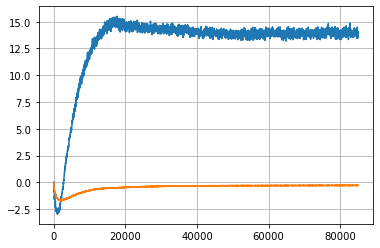

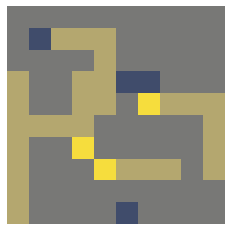

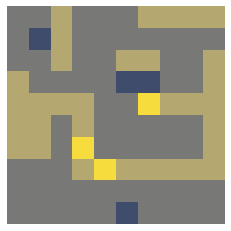

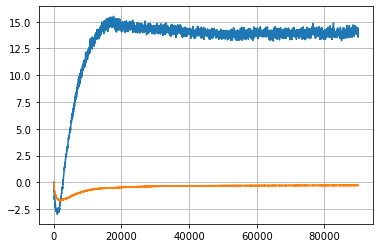

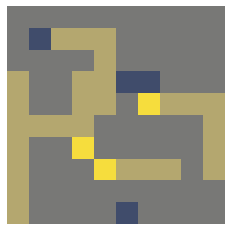

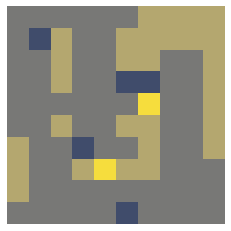

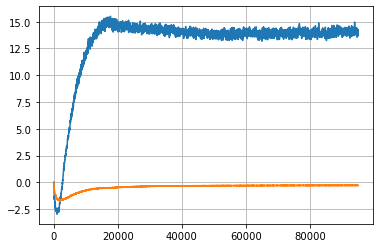

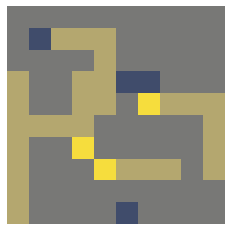

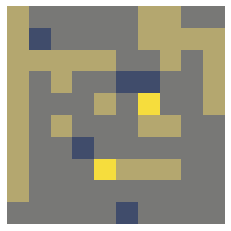

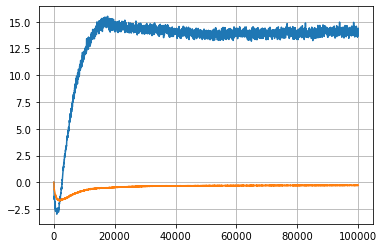

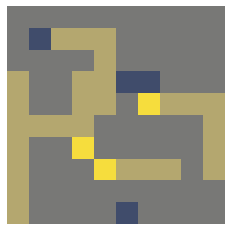

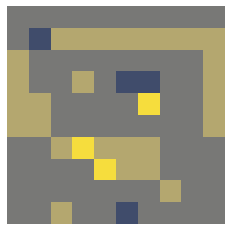

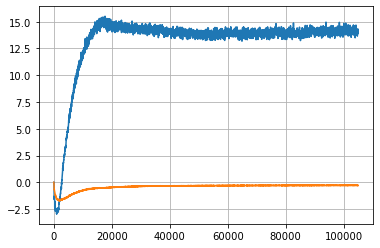

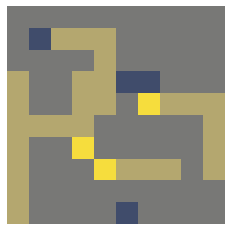

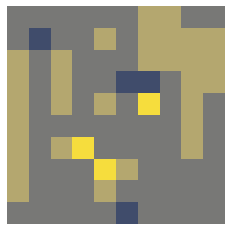

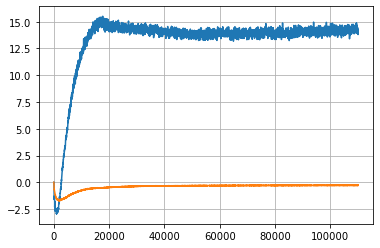

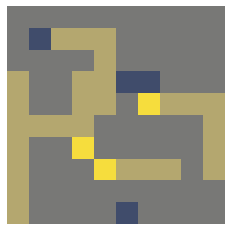

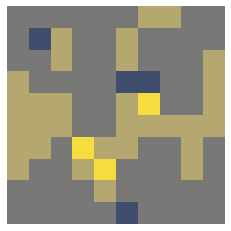

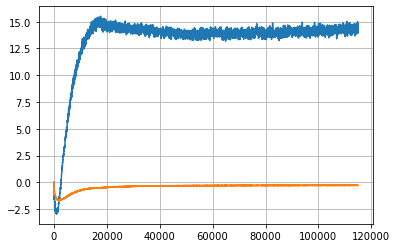

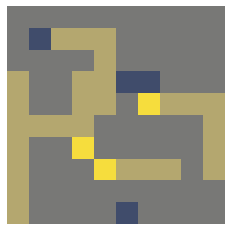

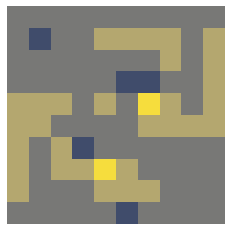

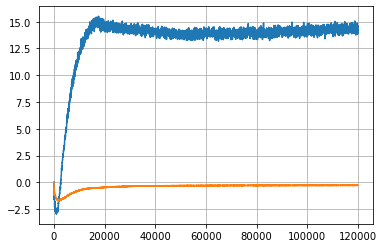

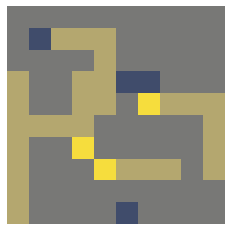

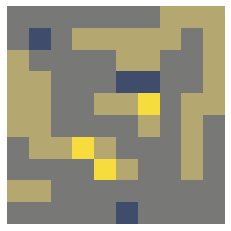

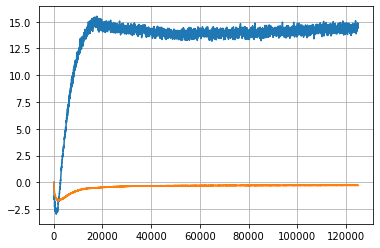

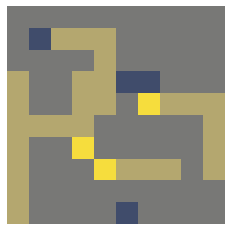

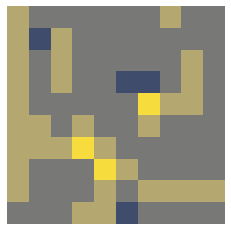

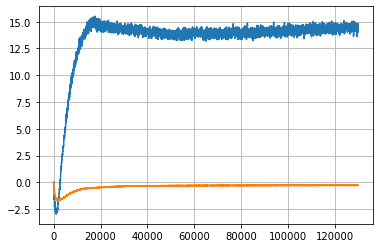

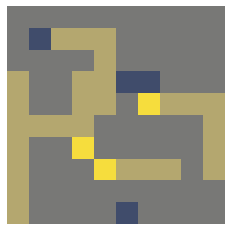

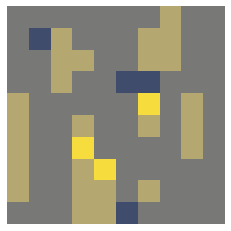

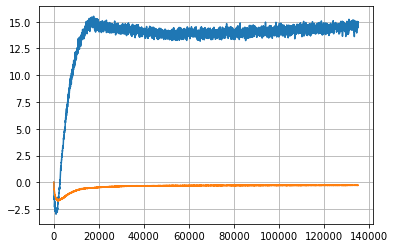

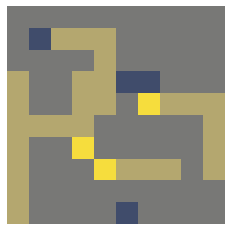

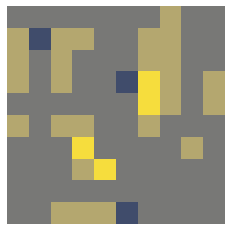

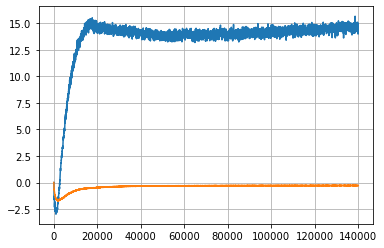

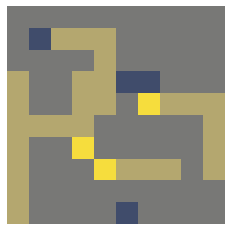

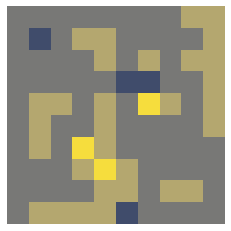

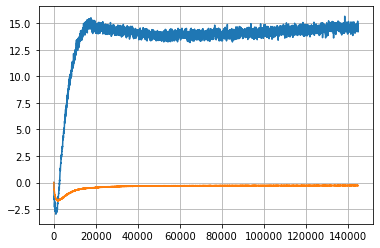

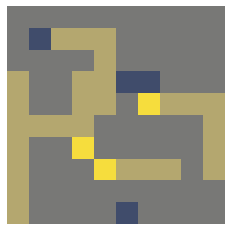

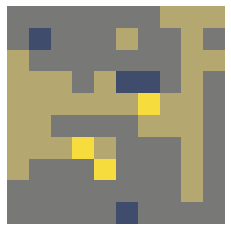

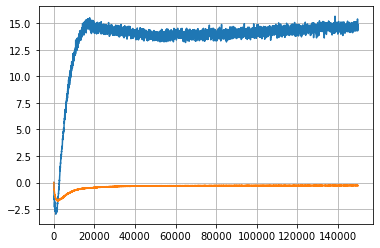

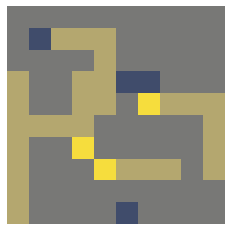

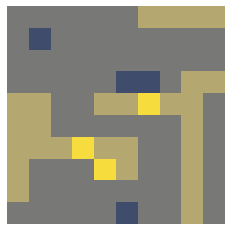

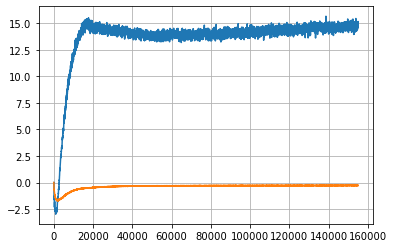

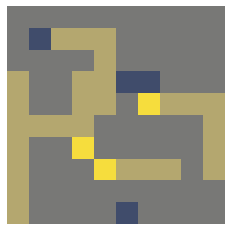

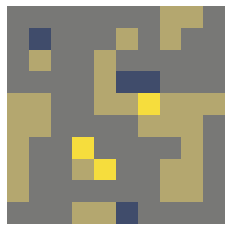

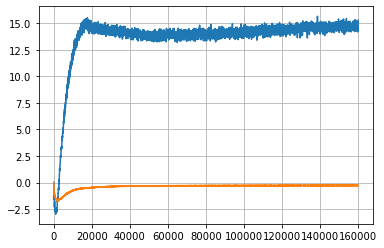

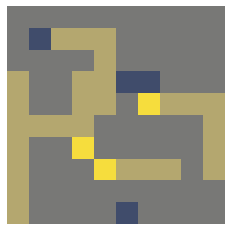

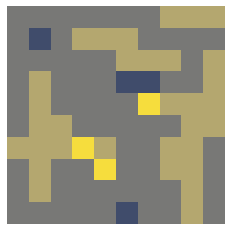

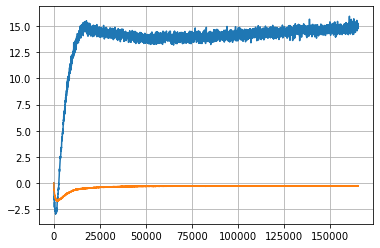

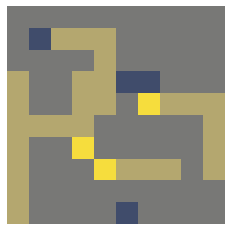

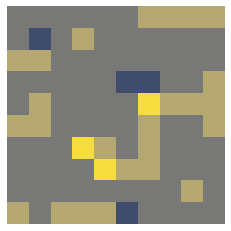

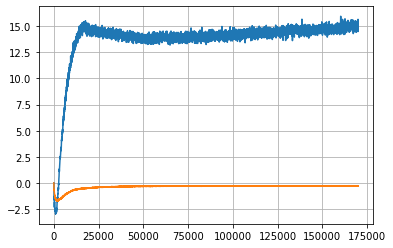

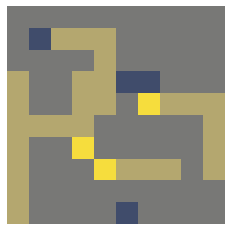

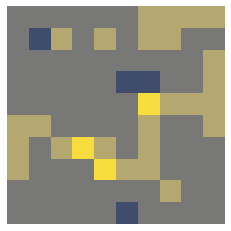

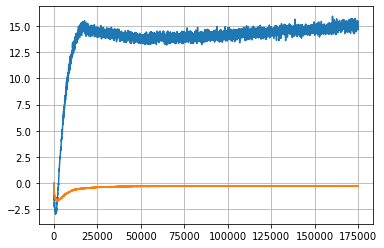

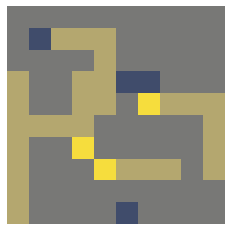

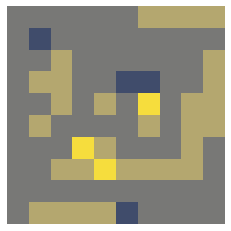

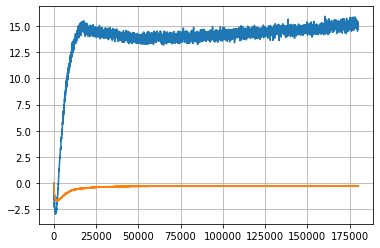

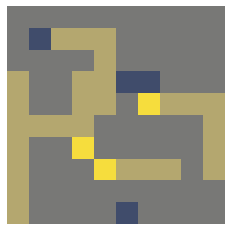

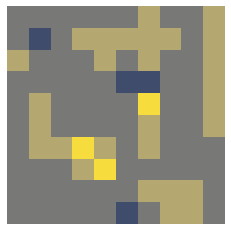

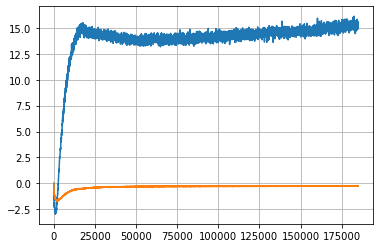

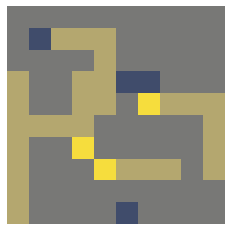

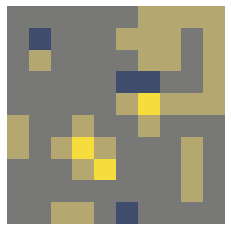

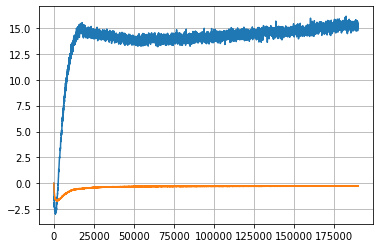

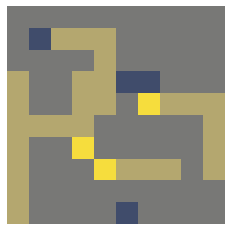

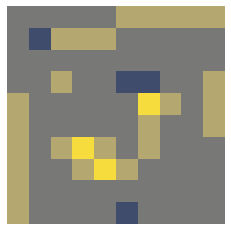

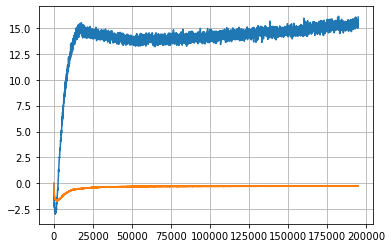

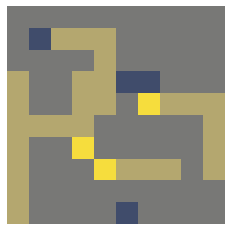

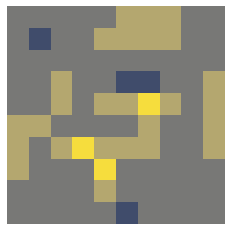

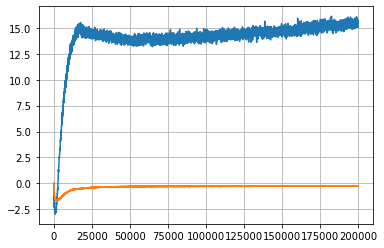

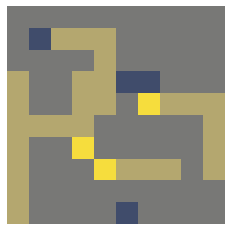

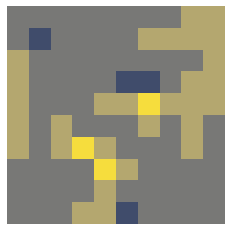

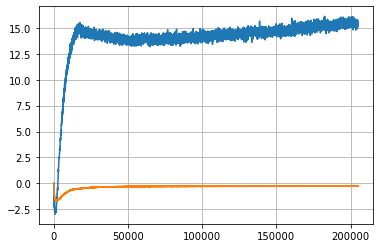

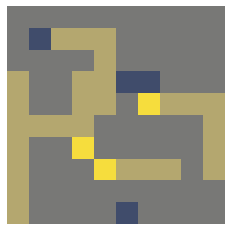

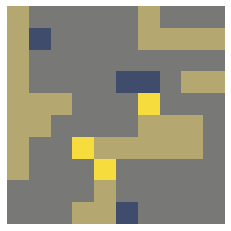

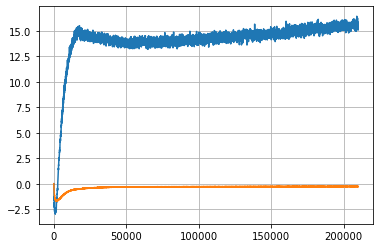

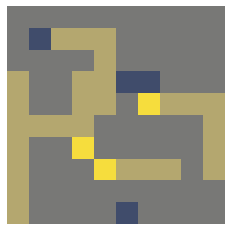

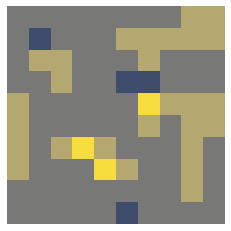

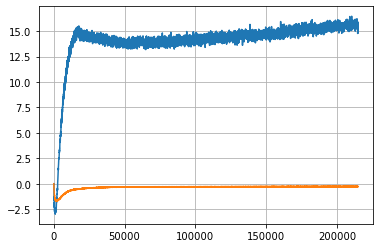

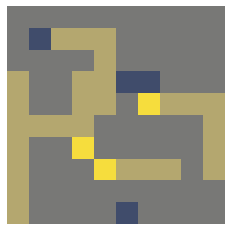

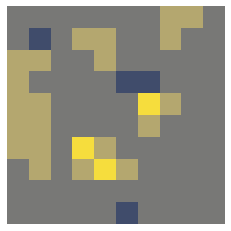

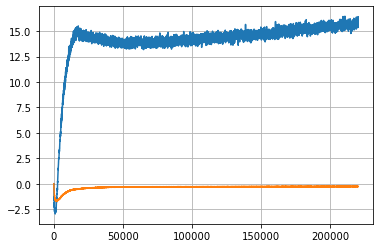

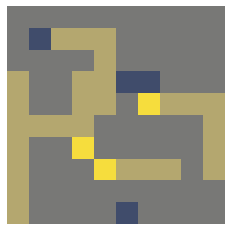

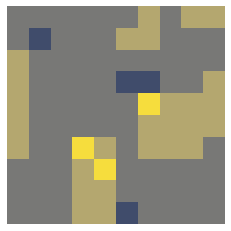

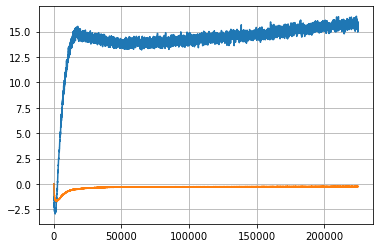

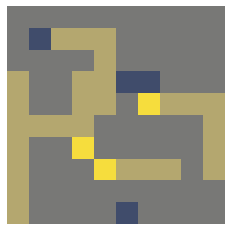

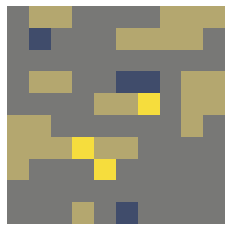

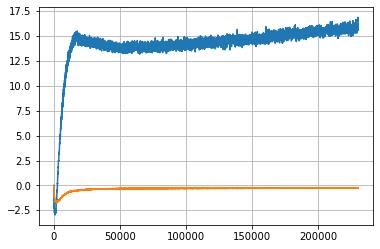

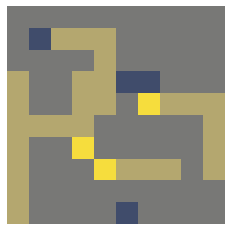

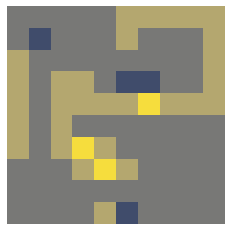

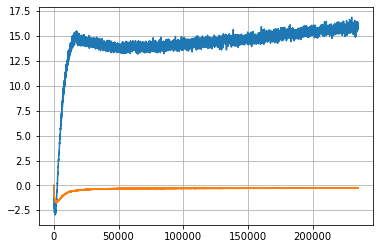

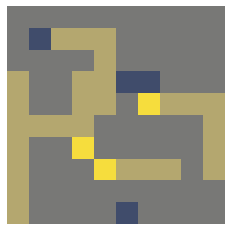

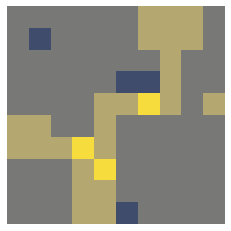

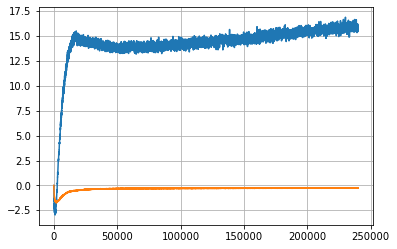

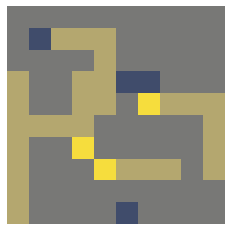

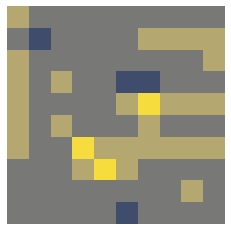

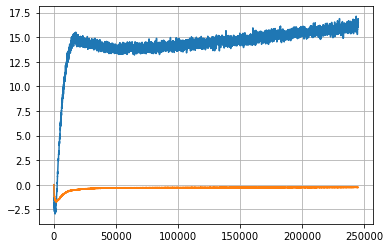

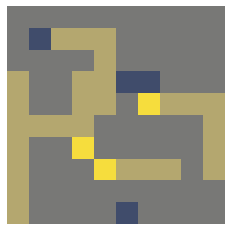

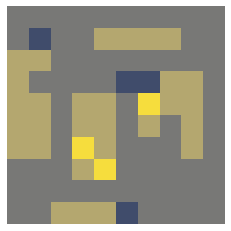

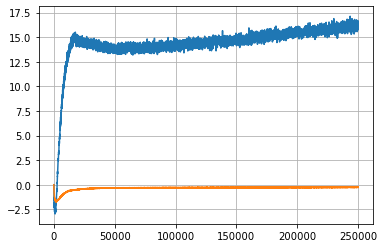

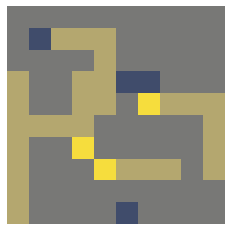

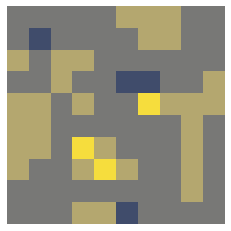

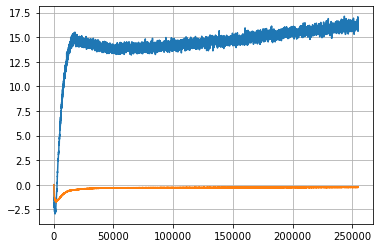

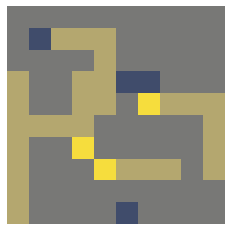

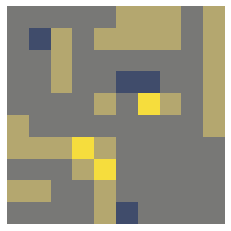

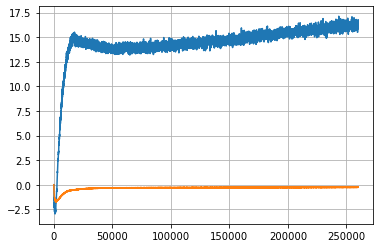

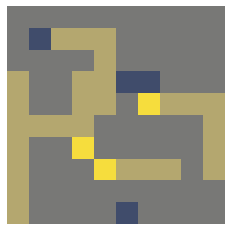

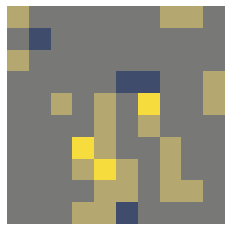

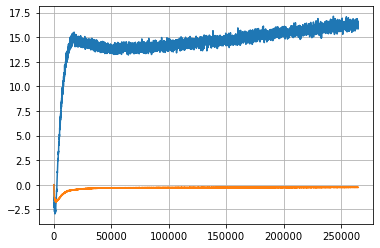

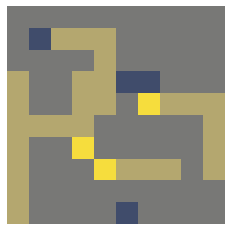

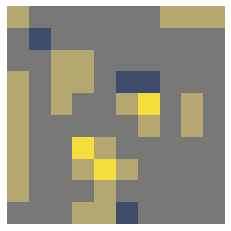

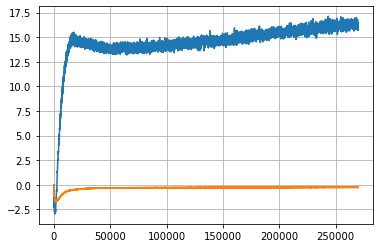

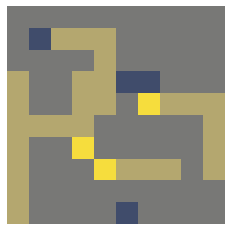

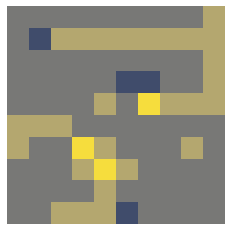

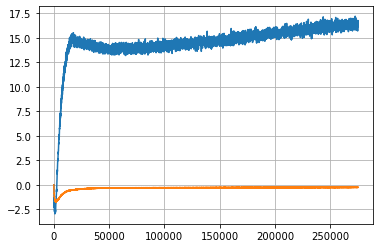

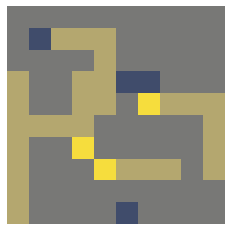

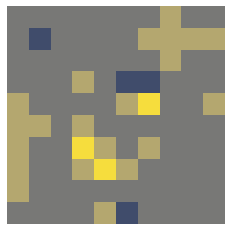

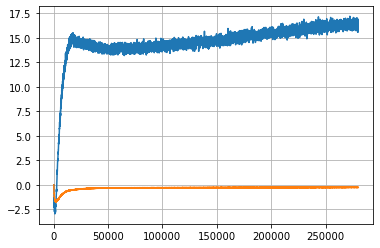

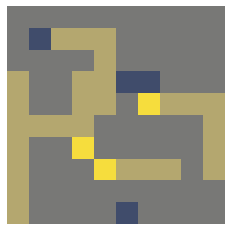

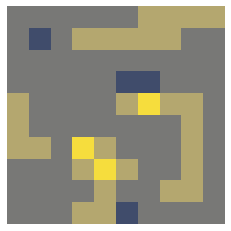

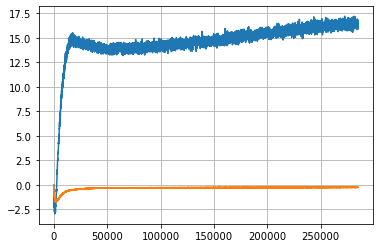

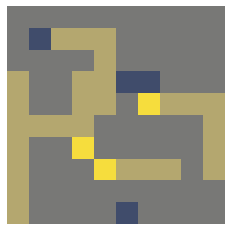

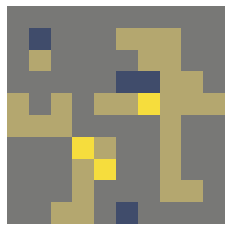

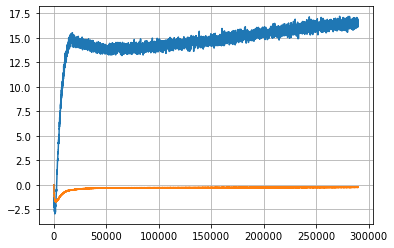

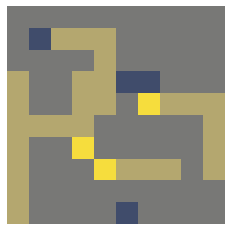

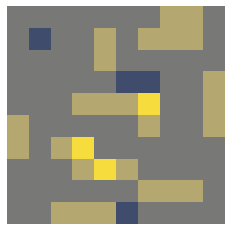

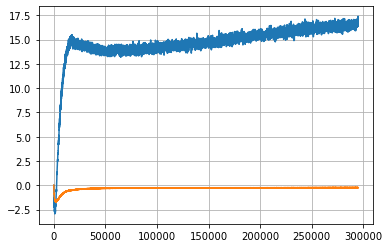

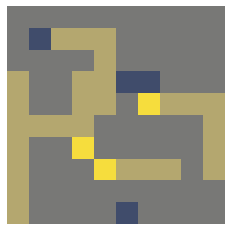

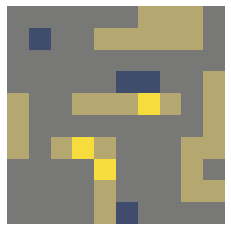

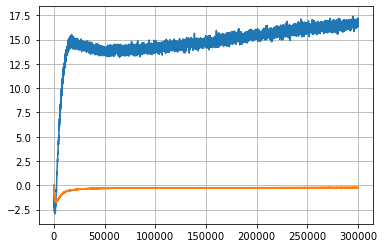

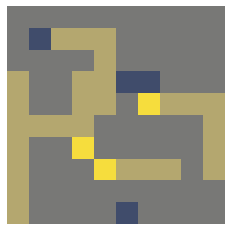

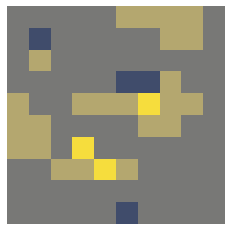

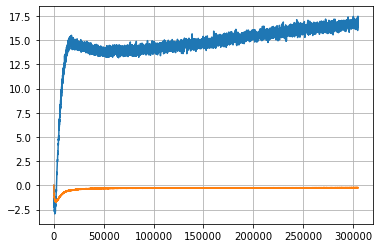

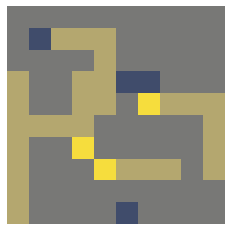

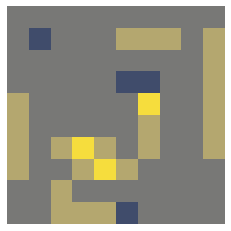

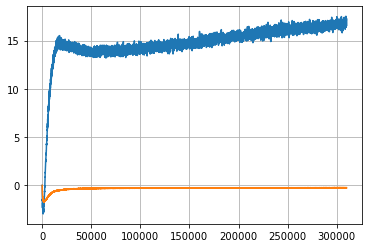

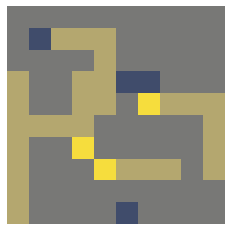

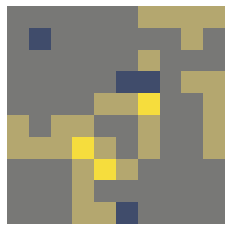

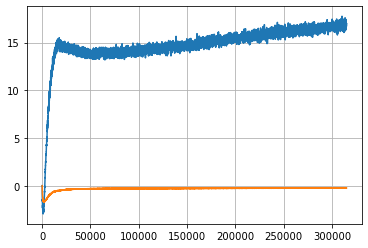

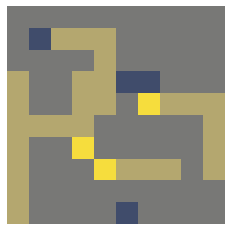

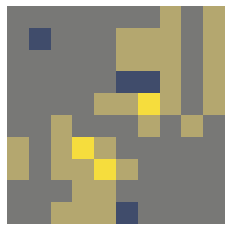

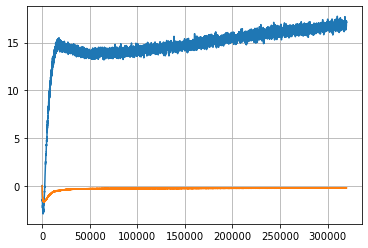

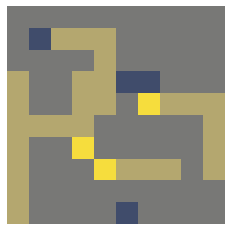

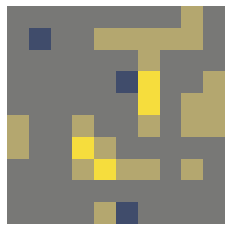

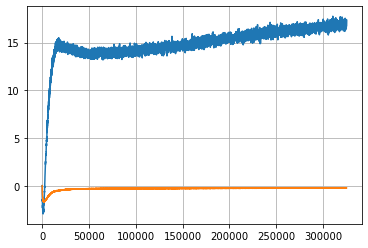

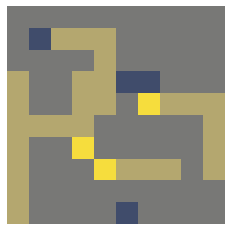

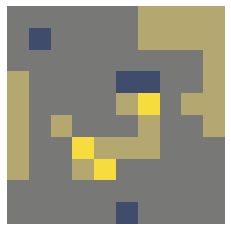

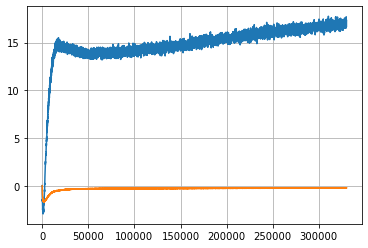

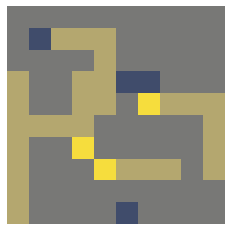

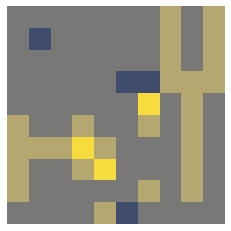

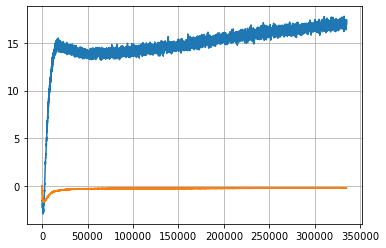

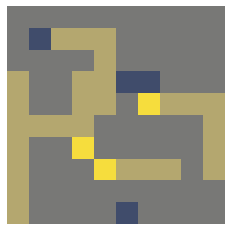

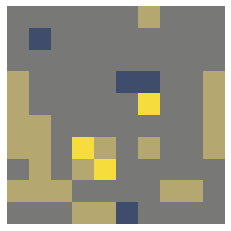

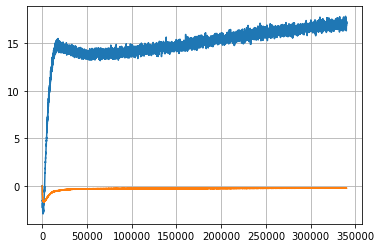

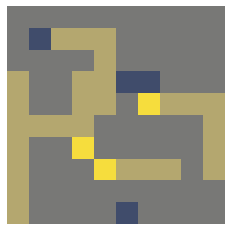

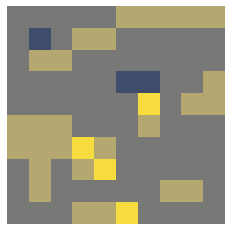

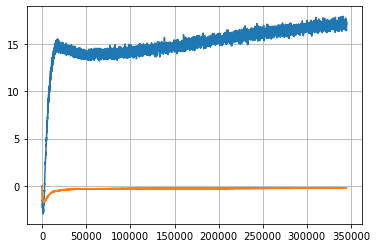

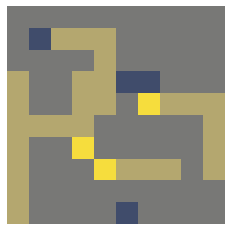

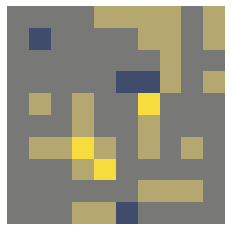

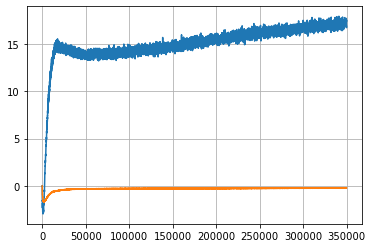

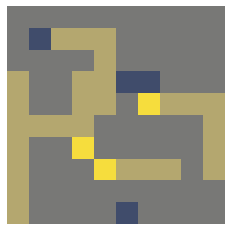

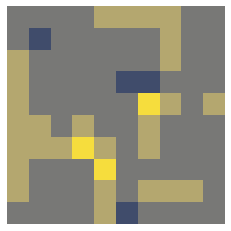

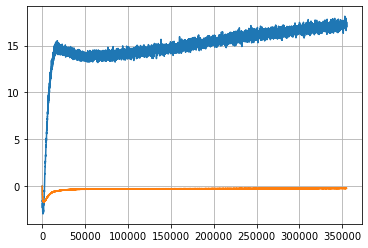

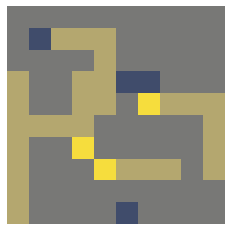

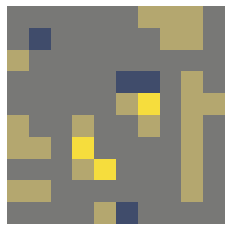

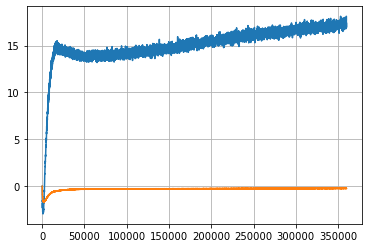

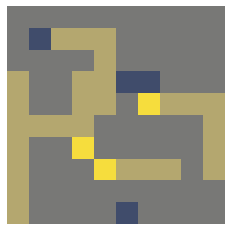

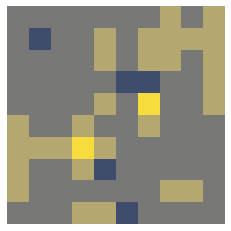

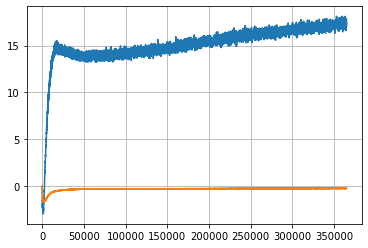

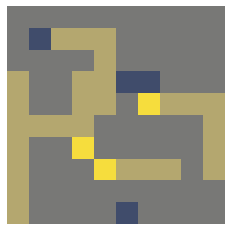

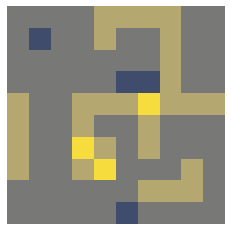

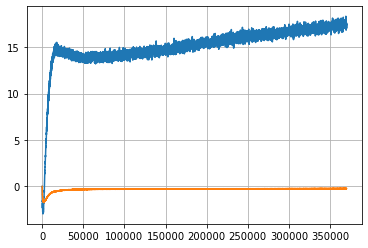

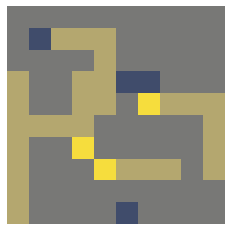

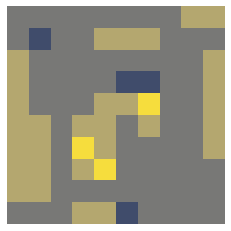

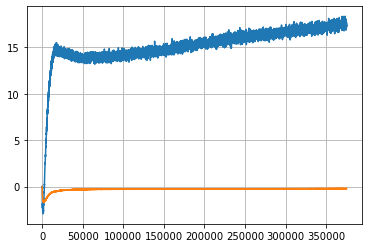

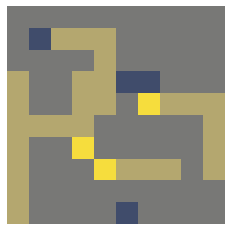

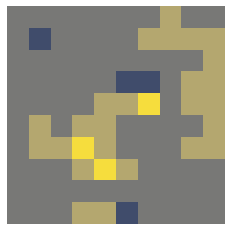

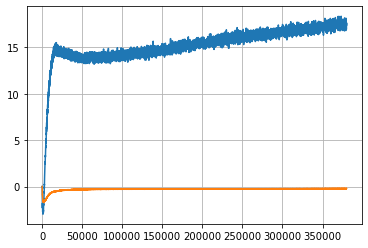

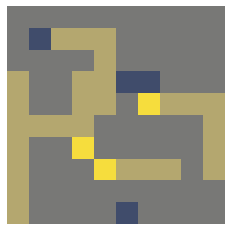

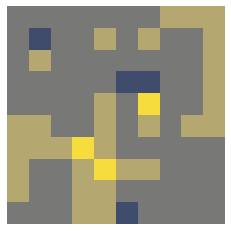

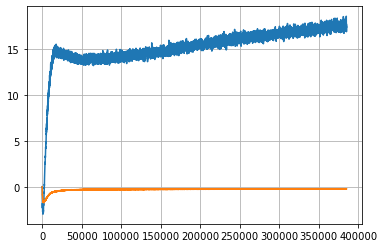

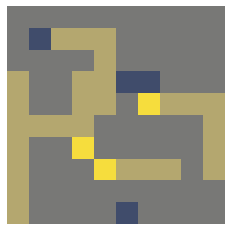

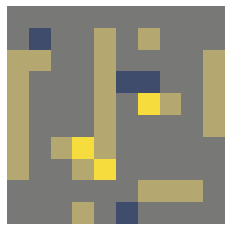

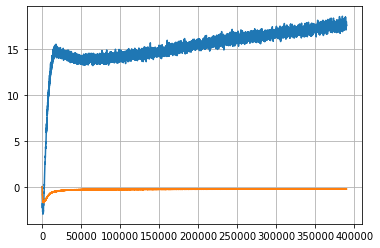

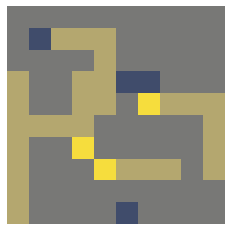

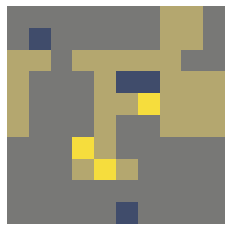

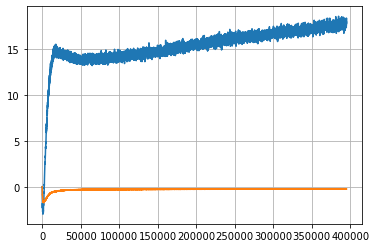

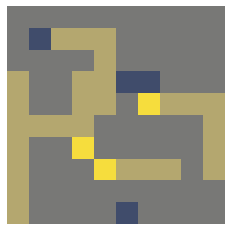

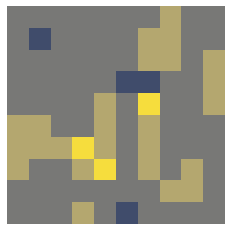

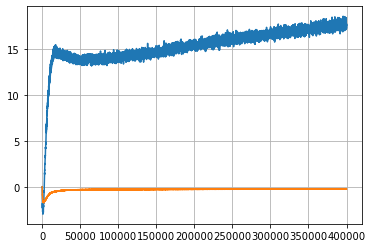

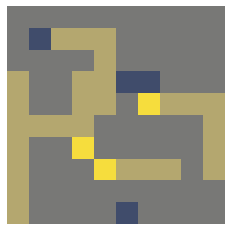

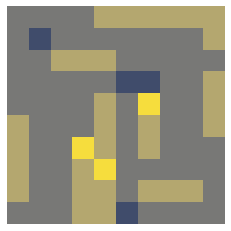

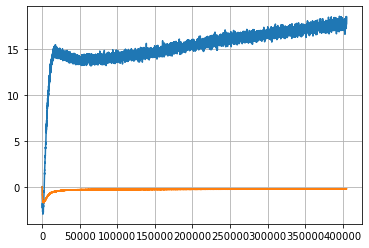

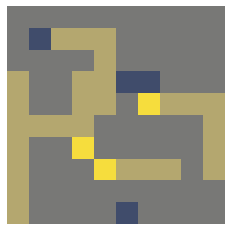

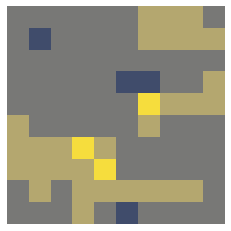

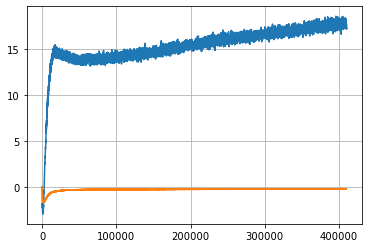

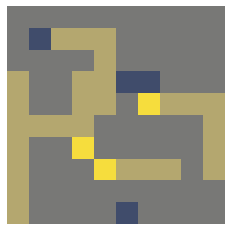

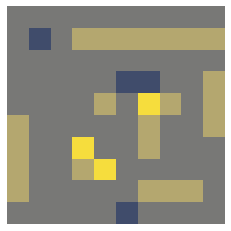

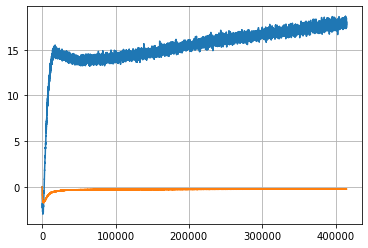

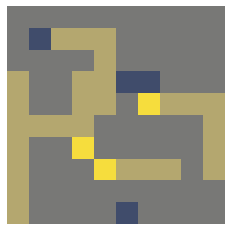

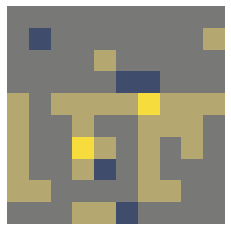

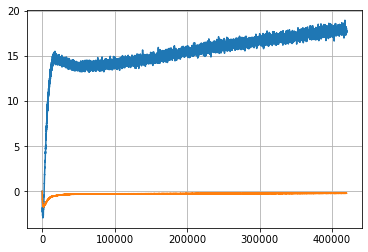

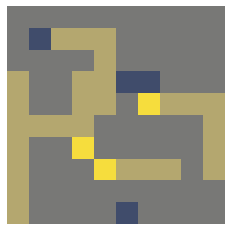

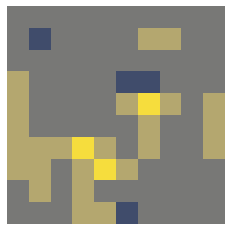

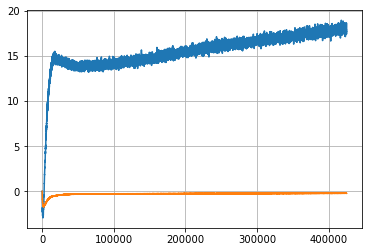

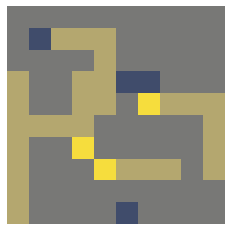

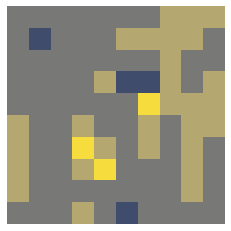

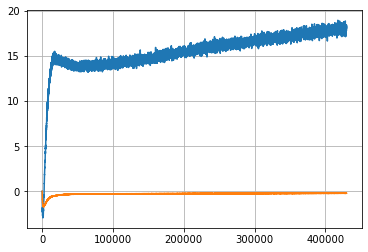

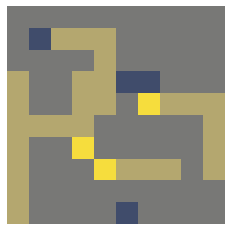

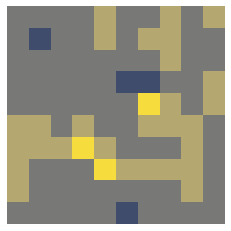

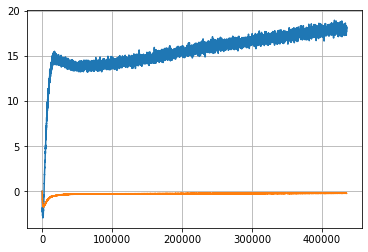

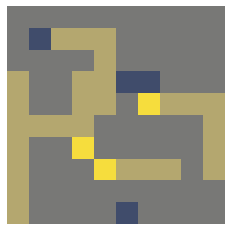

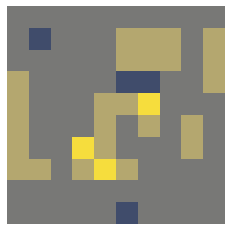

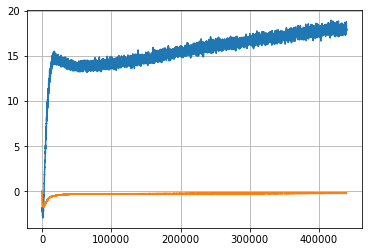

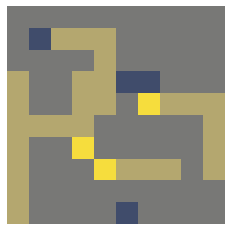

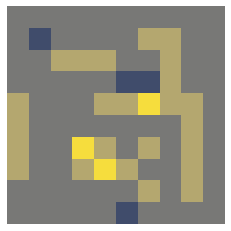

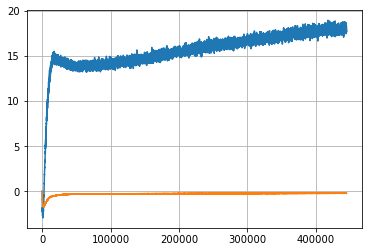

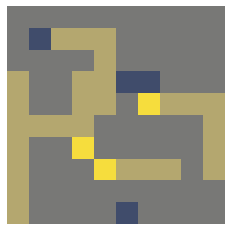

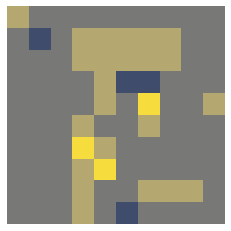

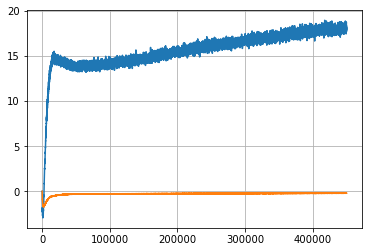

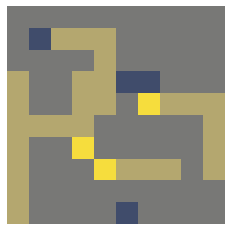

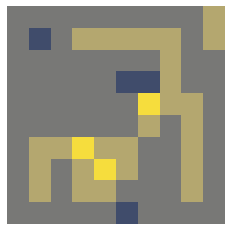

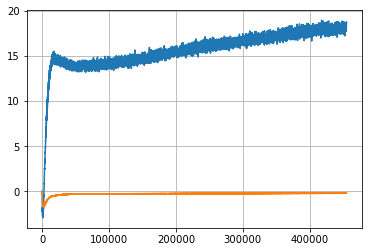

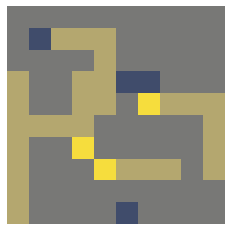

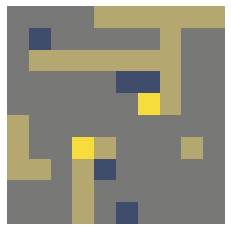

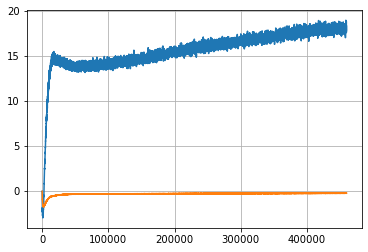

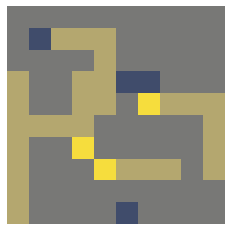

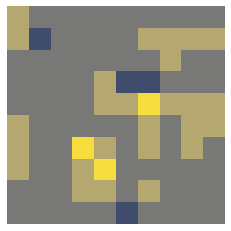

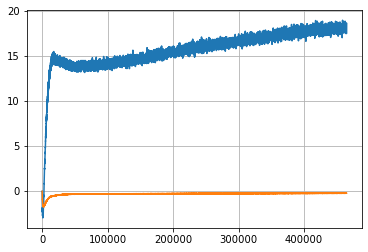

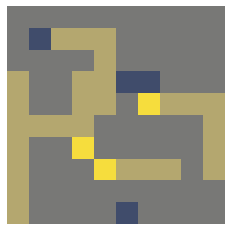

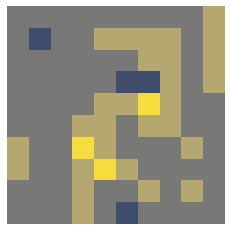

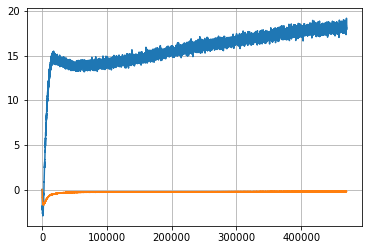

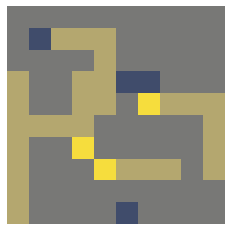

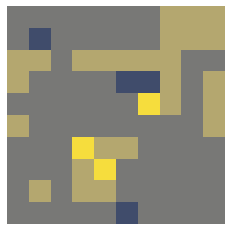

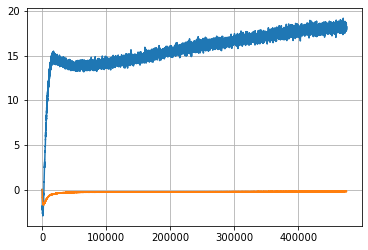

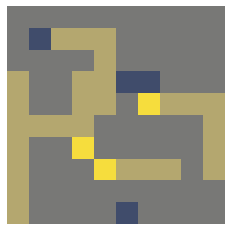

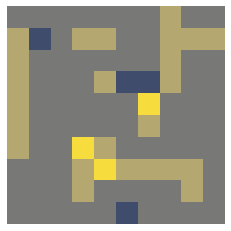

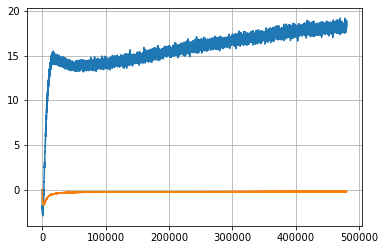

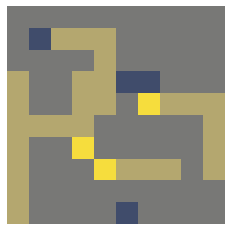

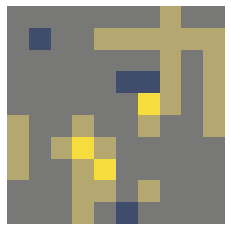

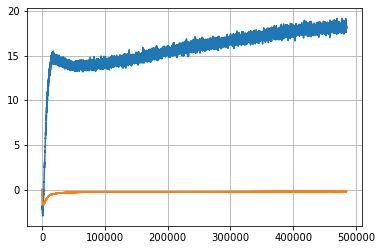

In [ ]:
from utils import *
from tqdm.notebook import trange

batch_size = 64
bgen = batchgen_coll(size=batch_size)

rl_gen = []
rl_dis = []

for k in trange(9999999):
    
    x, yt = next(bgen)
    z = np.random.randn(batch_size, random_dim)
    x, yt, z = np2t(x, yt, z)
    
    # generator
    gen.zero_grad()
    yp = gen(x, z)
    dp = dis(x, yp)
    loss_g = dp.mean()
    loss_g.backward()
    gen.optim.step()
    
    # discriminator
    dis.zero_grad()
    yp = yp.detach()
    dp = dis(x, yp)
    dt = dis(x, yt)
    loss_d = dt.mean() - dp.mean()
    loss_d.backward()
    dis.optim.step()
    
    # Statistics
    rl_gen += [loss_g.item()]
    rl_dis += [loss_d.item()]
    
    #print(gen.iters)
    
    # Losses
    if gen.iters % 20 == 0:
        gen.losses += [(gen.iters, np.mean(rl_gen))]
        dis.losses += [(gen.iters, np.mean(rl_dis))]
        rl_gen = []
        rl_dis = []

    # Pictures
    if gen.iters % 5000 == 0:
        gen.eval()
        sea = create_sea(0)
        det = np.zeros((10,10))
        det[1,1]=det[3,5]=det[4,6]=det[7,4]=det[3,6]=det[6,3]=det[9,5]=1
        plot_sea(sea,det)
        plt.show()
        x = encode_x(sea,det)[None]
        z = np.random.randn(1,random_dim)
        yp = gen(*np2t(x,z))
        yp = t2np(yp)[0,:,:,0] > 0.5
        plot_sea(yp,det)
        plt.show()
        gen.train()
        
        plt.plot(*zip(*gen.losses))
        plt.plot(*zip(*dis.losses))
        plt.grid()
        plt.show()

    gen.iters += 1
    
    
    #break

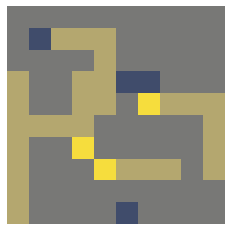

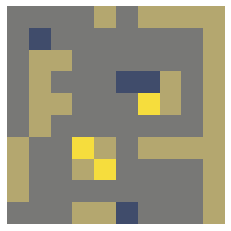

In [75]:
# Beipsiel anzeigen
gen.eval()
sea = create_sea(0)
det = np.zeros((10,10))
det[1,1]=det[3,5]=det[4,6]=det[7,4]=det[3,6]=det[6,3]=det[9,5]=1
plot_sea(sea,det)
plt.show()
x = encode_x(sea,det)[None]
z = np.random.randn(1,random_dim)
yp = gen(*np2t(x,z))
yp = t2np(yp)[0,:,:,0] > 0.5
plot_sea(yp,det)
gen.train();

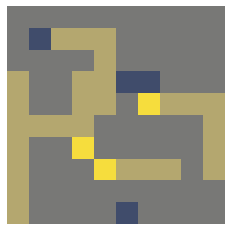

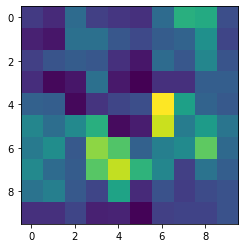

In [62]:
# Beipsiel anzeigen
gen.eval()
sea = create_sea(0)
det = np.zeros((10,10))
det[1,1]=det[3,5]=det[4,6]=det[7,4]=det[3,6]=det[6,3]=det[9,5]=1
plot_sea(sea,det)
plt.show()
yps = []
for _ in range(100):
    x = encode_x(sea,det)[None]
    z = np.random.randn(1,random_dim)
    yp = gen(*np2t(x,z))
    yp = t2np(yp)[0,:,:,0] > 0.5
    #plot_sea(yp,det)
    yps.append(yp)
gen.train();

plt.imshow(np.mean(yps, 0))

In [59]:
np.mean(yps, 0).shape

(10, 10)